In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="LSTM seq 128.", name="epoch 2000")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.LSTM(128, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=2000, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense (Dense)               (None, 25)                3225      
                                                                 
Total params: 70,297
Trainable params: 70,297
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/2000
1/5 [=====>........................] - ETA: 6s - loss: 1.6650 - mae: 1.2122

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 6s 1s/step - loss: 1.3192 - mae: 1.0610 - val_loss: 1.0051 - val_mae: 0.9085
Epoch 2/2000
5/5 [==============================] - ETA: 0s - loss: 0.8060 - mae: 0.7810

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.8060 - mae: 0.7810 - val_loss: 0.3338 - val_mae: 0.4625
Epoch 3/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.2893 - mae: 0.4311

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 906ms/step - loss: 0.2868 - mae: 0.4297 - val_loss: 0.2187 - val_mae: 0.3820
Epoch 4/2000
5/5 [==============================] - ETA: 0s - loss: 0.1933 - mae: 0.3634

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 975ms/step - loss: 0.1933 - mae: 0.3634 - val_loss: 0.1786 - val_mae: 0.3459
Epoch 5/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.1840 - mae: 0.3511

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 951ms/step - loss: 0.1854 - mae: 0.3534 - val_loss: 0.1769 - val_mae: 0.3481
Epoch 6/2000
5/5 [==============================] - ETA: 0s - loss: 0.1730 - mae: 0.3426

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 936ms/step - loss: 0.1730 - mae: 0.3426 - val_loss: 0.1600 - val_mae: 0.3336
Epoch 7/2000
5/5 [==============================] - ETA: 0s - loss: 0.1526 - mae: 0.3232

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 961ms/step - loss: 0.1526 - mae: 0.3232 - val_loss: 0.1408 - val_mae: 0.3111
Epoch 8/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.1371 - mae: 0.3045

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 981ms/step - loss: 0.1369 - mae: 0.3049 - val_loss: 0.1217 - val_mae: 0.2867
Epoch 9/2000
5/5 [==============================] - ETA: 0s - loss: 0.1113 - mae: 0.2703

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 919ms/step - loss: 0.1113 - mae: 0.2703 - val_loss: 0.0908 - val_mae: 0.2457
Epoch 10/2000
5/5 [==============================] - ETA: 0s - loss: 0.0821 - mae: 0.2248

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 964ms/step - loss: 0.0821 - mae: 0.2248 - val_loss: 0.0857 - val_mae: 0.2410
Epoch 11/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0812 - mae: 0.2273

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1000ms/step - loss: 0.0818 - mae: 0.2255 - val_loss: 0.0662 - val_mae: 0.2057
Epoch 12/2000
5/5 [==============================] - ETA: 0s - loss: 0.0681 - mae: 0.2060

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0681 - mae: 0.2060 - val_loss: 0.0647 - val_mae: 0.1983
Epoch 13/2000
5/5 [==============================] - ETA: 0s - loss: 0.0638 - mae: 0.1974

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 943ms/step - loss: 0.0638 - mae: 0.1974 - val_loss: 0.0641 - val_mae: 0.1945
Epoch 14/2000
5/5 [==============================] - ETA: 0s - loss: 0.0625 - mae: 0.1938

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 964ms/step - loss: 0.0625 - mae: 0.1938 - val_loss: 0.0594 - val_mae: 0.1894
Epoch 15/2000
5/5 [==============================] - 0s 66ms/step - loss: 0.0596 - mae: 0.1876 - val_loss: 0.0654 - val_mae: 0.2033
Epoch 16/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0649 - mae: 0.2032

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 895ms/step - loss: 0.0634 - mae: 0.1970 - val_loss: 0.0579 - val_mae: 0.1839
Epoch 17/2000
5/5 [==============================] - 0s 81ms/step - loss: 0.0593 - mae: 0.1882 - val_loss: 0.0633 - val_mae: 0.1918
Epoch 18/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0589 - mae: 0.1873

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0604 - mae: 0.1893 - val_loss: 0.0577 - val_mae: 0.1831
Epoch 19/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0574 - mae: 0.1831 - val_loss: 0.0577 - val_mae: 0.1838
Epoch 20/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0578 - mae: 0.1836

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 959ms/step - loss: 0.0567 - mae: 0.1817 - val_loss: 0.0572 - val_mae: 0.1834
Epoch 21/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.0565 - mae: 0.1814 - val_loss: 0.0580 - val_mae: 0.1827
Epoch 22/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0564 - mae: 0.1804

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 953ms/step - loss: 0.0566 - mae: 0.1810 - val_loss: 0.0570 - val_mae: 0.1817
Epoch 23/2000
5/5 [==============================] - ETA: 0s - loss: 0.0565 - mae: 0.1810

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 980ms/step - loss: 0.0565 - mae: 0.1810 - val_loss: 0.0566 - val_mae: 0.1815
Epoch 24/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0569 - mae: 0.1819 - val_loss: 0.0569 - val_mae: 0.1830
Epoch 25/2000
5/5 [==============================] - 0s 50ms/step - loss: 0.0567 - mae: 0.1817 - val_loss: 0.0584 - val_mae: 0.1860
Epoch 26/2000
5/5 [==============================] - 0s 42ms/step - loss: 0.0573 - mae: 0.1826 - val_loss: 0.0572 - val_mae: 0.1832
Epoch 27/2000
5/5 [==============================] - 0s 39ms/step - loss: 0.0565 - mae: 0.1812 - val_loss: 0.0574 - val_mae: 0.1819
Epoch 28/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0565 - mae: 0.1813 - val_loss: 0.0567 - val_mae: 0.1829
Epoch 29/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0569 - mae: 0.1822 - val_loss: 0.0573 - val_mae: 0.1846
Epoch 30/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0566 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 916ms/step - loss: 0.0560 - mae: 0.1806 - val_loss: 0.0564 - val_mae: 0.1816
Epoch 33/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0558 - mae: 0.1799 - val_loss: 0.0590 - val_mae: 0.1887
Epoch 34/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.0572 - mae: 0.1836 - val_loss: 0.0569 - val_mae: 0.1830
Epoch 35/2000
5/5 [==============================] - 0s 42ms/step - loss: 0.0569 - mae: 0.1823 - val_loss: 0.0565 - val_mae: 0.1825
Epoch 36/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0568 - mae: 0.1825 - val_loss: 0.0570 - val_mae: 0.1836
Epoch 37/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0500 - mae: 0.1733

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 960ms/step - loss: 0.0564 - mae: 0.1814 - val_loss: 0.0563 - val_mae: 0.1816
Epoch 38/2000
5/5 [==============================] - 0s 60ms/step - loss: 0.0555 - mae: 0.1796 - val_loss: 0.0571 - val_mae: 0.1820
Epoch 39/2000
5/5 [==============================] - 0s 25ms/step - loss: 0.0563 - mae: 0.1818 - val_loss: 0.0582 - val_mae: 0.1830
Epoch 40/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0566 - mae: 0.1817 - val_loss: 0.0587 - val_mae: 0.1840
Epoch 41/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0549 - mae: 0.1789

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 915ms/step - loss: 0.0565 - mae: 0.1810 - val_loss: 0.0560 - val_mae: 0.1815
Epoch 42/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0544 - mae: 0.1780

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 930ms/step - loss: 0.0558 - mae: 0.1802 - val_loss: 0.0560 - val_mae: 0.1809
Epoch 43/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0553 - mae: 0.1797 - val_loss: 0.0566 - val_mae: 0.1815
Epoch 44/2000
5/5 [==============================] - 0s 56ms/step - loss: 0.0556 - mae: 0.1798 - val_loss: 0.0581 - val_mae: 0.1833
Epoch 45/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.0561 - mae: 0.1812 - val_loss: 0.0590 - val_mae: 0.1842
Epoch 46/2000
5/5 [==============================] - 0s 37ms/step - loss: 0.0570 - mae: 0.1829 - val_loss: 0.0563 - val_mae: 0.1802
Epoch 47/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0557 - mae: 0.1804 - val_loss: 0.0561 - val_mae: 0.1813
Epoch 48/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0551 - mae: 0.1796 - val_loss: 0.0562 - val_mae: 0.1824
Epoch 49/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0553 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 906ms/step - loss: 0.0562 - mae: 0.1814 - val_loss: 0.0555 - val_mae: 0.1804
Epoch 64/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0535 - mae: 0.1763

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 955ms/step - loss: 0.0552 - mae: 0.1792 - val_loss: 0.0550 - val_mae: 0.1796
Epoch 65/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0548 - mae: 0.1784 - val_loss: 0.0560 - val_mae: 0.1810
Epoch 66/2000
5/5 [==============================] - 0s 47ms/step - loss: 0.0551 - mae: 0.1793 - val_loss: 0.0592 - val_mae: 0.1892
Epoch 67/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0570 - mae: 0.1829 - val_loss: 0.0586 - val_mae: 0.1886
Epoch 68/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.0565 - mae: 0.1824 - val_loss: 0.0557 - val_mae: 0.1821
Epoch 69/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0554 - mae: 0.1800 - val_loss: 0.0559 - val_mae: 0.1810
Epoch 70/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0548 - mae: 0.1788 - val_loss: 0.0563 - val_mae: 0.1828
Epoch 71/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0554 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 919ms/step - loss: 0.0565 - mae: 0.1822 - val_loss: 0.0547 - val_mae: 0.1792
Epoch 93/2000
5/5 [==============================] - 0s 68ms/step - loss: 0.0548 - mae: 0.1786 - val_loss: 0.0560 - val_mae: 0.1826
Epoch 94/2000
5/5 [==============================] - 0s 50ms/step - loss: 0.0541 - mae: 0.1782 - val_loss: 0.0578 - val_mae: 0.1862
Epoch 95/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.0555 - mae: 0.1805 - val_loss: 0.0600 - val_mae: 0.1931
Epoch 96/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0566 - mae: 0.1827 - val_loss: 0.0603 - val_mae: 0.1953
Epoch 97/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0565 - mae: 0.1835 - val_loss: 0.0561 - val_mae: 0.1804
Epoch 98/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0547 - mae: 0.1794 - val_loss: 0.0577 - val_mae: 0.1823
Epoch 99/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0547 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 905ms/step - loss: 0.0523 - mae: 0.1745 - val_loss: 0.0544 - val_mae: 0.1777
Epoch 125/2000
5/5 [==============================] - 0s 90ms/step - loss: 0.0521 - mae: 0.1739 - val_loss: 0.0550 - val_mae: 0.1801
Epoch 126/2000
5/5 [==============================] - 0s 46ms/step - loss: 0.0524 - mae: 0.1744 - val_loss: 0.0552 - val_mae: 0.1797
Epoch 127/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0524 - mae: 0.1747 - val_loss: 0.0557 - val_mae: 0.1827
Epoch 128/2000
5/5 [==============================] - 0s 35ms/step - loss: 0.0527 - mae: 0.1761 - val_loss: 0.0561 - val_mae: 0.1794
Epoch 129/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0528 - mae: 0.1767 - val_loss: 0.0550 - val_mae: 0.1773
Epoch 130/2000
5/5 [==============================] - 0s 39ms/step - loss: 0.0527 - mae: 0.1754 - val_loss: 0.0567 - val_mae: 0.1791
Epoch 131/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0536 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 932ms/step - loss: 0.0526 - mae: 0.1754 - val_loss: 0.0543 - val_mae: 0.1774
Epoch 137/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.0522 - mae: 0.1748 - val_loss: 0.0559 - val_mae: 0.1788
Epoch 138/2000
5/5 [==============================] - 0s 54ms/step - loss: 0.0523 - mae: 0.1754 - val_loss: 0.0548 - val_mae: 0.1777
Epoch 139/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0561 - mae: 0.1777

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 985ms/step - loss: 0.0515 - mae: 0.1729 - val_loss: 0.0541 - val_mae: 0.1775
Epoch 140/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0515 - mae: 0.1732 - val_loss: 0.0542 - val_mae: 0.1784
Epoch 141/2000
5/5 [==============================] - 0s 46ms/step - loss: 0.0514 - mae: 0.1733 - val_loss: 0.0562 - val_mae: 0.1796
Epoch 142/2000
5/5 [==============================] - 0s 36ms/step - loss: 0.0517 - mae: 0.1742 - val_loss: 0.0544 - val_mae: 0.1764
Epoch 143/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0520 - mae: 0.1743 - val_loss: 0.0541 - val_mae: 0.1763
Epoch 144/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0517 - mae: 0.1735 - val_loss: 0.0557 - val_mae: 0.1818
Epoch 145/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0516 - mae: 0.1733 - val_loss: 0.0542 - val_mae: 0.1784
Epoch 146/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0514 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 920ms/step - loss: 0.0514 - mae: 0.1734 - val_loss: 0.0540 - val_mae: 0.1768
Epoch 148/2000
5/5 [==============================] - ETA: 0s - loss: 0.0512 - mae: 0.1738

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 936ms/step - loss: 0.0512 - mae: 0.1738 - val_loss: 0.0537 - val_mae: 0.1753
Epoch 149/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0516 - mae: 0.1738

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 956ms/step - loss: 0.0509 - mae: 0.1716 - val_loss: 0.0535 - val_mae: 0.1759
Epoch 150/2000
5/5 [==============================] - 0s 58ms/step - loss: 0.0504 - mae: 0.1713 - val_loss: 0.0539 - val_mae: 0.1773
Epoch 151/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0506 - mae: 0.1716 - val_loss: 0.0542 - val_mae: 0.1795
Epoch 152/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0507 - mae: 0.1721 - val_loss: 0.0537 - val_mae: 0.1770
Epoch 153/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0539 - mae: 0.1789

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 864ms/step - loss: 0.0502 - mae: 0.1710 - val_loss: 0.0534 - val_mae: 0.1752
Epoch 154/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0497 - mae: 0.1694

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 965ms/step - loss: 0.0500 - mae: 0.1710 - val_loss: 0.0531 - val_mae: 0.1749
Epoch 155/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0501 - mae: 0.1712 - val_loss: 0.0544 - val_mae: 0.1761
Epoch 156/2000
5/5 [==============================] - 0s 52ms/step - loss: 0.0503 - mae: 0.1717 - val_loss: 0.0534 - val_mae: 0.1758
Epoch 157/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.0500 - mae: 0.1710 - val_loss: 0.0537 - val_mae: 0.1778
Epoch 158/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.0497 - mae: 0.1700 - val_loss: 0.0537 - val_mae: 0.1788
Epoch 159/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0507 - mae: 0.1727 - val_loss: 0.0541 - val_mae: 0.1760
Epoch 160/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0518 - mae: 0.1777

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 903ms/step - loss: 0.0500 - mae: 0.1713 - val_loss: 0.0530 - val_mae: 0.1758
Epoch 161/2000
5/5 [==============================] - 0s 70ms/step - loss: 0.0494 - mae: 0.1697 - val_loss: 0.0530 - val_mae: 0.1764
Epoch 162/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0483 - mae: 0.1679

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 945ms/step - loss: 0.0496 - mae: 0.1700 - val_loss: 0.0526 - val_mae: 0.1738
Epoch 163/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0493 - mae: 0.1704 - val_loss: 0.0541 - val_mae: 0.1772
Epoch 164/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0503 - mae: 0.1713

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 930ms/step - loss: 0.0492 - mae: 0.1698 - val_loss: 0.0525 - val_mae: 0.1763
Epoch 165/2000
5/5 [==============================] - ETA: 0s - loss: 0.0486 - mae: 0.1688

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 922ms/step - loss: 0.0486 - mae: 0.1688 - val_loss: 0.0522 - val_mae: 0.1741
Epoch 166/2000
5/5 [==============================] - ETA: 0s - loss: 0.0480 - mae: 0.1673

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 921ms/step - loss: 0.0480 - mae: 0.1673 - val_loss: 0.0518 - val_mae: 0.1746
Epoch 167/2000
5/5 [==============================] - ETA: 0s - loss: 0.0477 - mae: 0.1676

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 968ms/step - loss: 0.0477 - mae: 0.1676 - val_loss: 0.0516 - val_mae: 0.1757
Epoch 168/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0472 - mae: 0.1671 - val_loss: 0.0528 - val_mae: 0.1784
Epoch 169/2000
5/5 [==============================] - 0s 54ms/step - loss: 0.0475 - mae: 0.1677 - val_loss: 0.0519 - val_mae: 0.1765
Epoch 170/2000
5/5 [==============================] - 0s 39ms/step - loss: 0.0472 - mae: 0.1671 - val_loss: 0.0522 - val_mae: 0.1769
Epoch 171/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0451 - mae: 0.1607

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 909ms/step - loss: 0.0479 - mae: 0.1685 - val_loss: 0.0516 - val_mae: 0.1759
Epoch 172/2000
5/5 [==============================] - 0s 58ms/step - loss: 0.0469 - mae: 0.1680 - val_loss: 0.0523 - val_mae: 0.1766
Epoch 173/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0479 - mae: 0.1689 - val_loss: 0.0520 - val_mae: 0.1750
Epoch 174/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0479 - mae: 0.1709 - val_loss: 0.0530 - val_mae: 0.1754
Epoch 175/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0524 - mae: 0.1773

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 917ms/step - loss: 0.0477 - mae: 0.1684 - val_loss: 0.0502 - val_mae: 0.1728
Epoch 176/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0469 - mae: 0.1669 - val_loss: 0.0527 - val_mae: 0.1789
Epoch 177/2000
5/5 [==============================] - 0s 42ms/step - loss: 0.0462 - mae: 0.1654 - val_loss: 0.0513 - val_mae: 0.1751
Epoch 178/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0482 - mae: 0.1729

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 910ms/step - loss: 0.0457 - mae: 0.1659 - val_loss: 0.0498 - val_mae: 0.1720
Epoch 179/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0452 - mae: 0.1635 - val_loss: 0.0521 - val_mae: 0.1730
Epoch 180/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0477 - mae: 0.1670

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 927ms/step - loss: 0.0463 - mae: 0.1661 - val_loss: 0.0495 - val_mae: 0.1715
Epoch 181/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0450 - mae: 0.1636 - val_loss: 0.0515 - val_mae: 0.1761
Epoch 182/2000
5/5 [==============================] - 0s 50ms/step - loss: 0.0460 - mae: 0.1645 - val_loss: 0.0517 - val_mae: 0.1782
Epoch 183/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0457 - mae: 0.1671

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 877ms/step - loss: 0.0458 - mae: 0.1648 - val_loss: 0.0485 - val_mae: 0.1693
Epoch 184/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0444 - mae: 0.1626 - val_loss: 0.0486 - val_mae: 0.1688
Epoch 185/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0432 - mae: 0.1597

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 960ms/step - loss: 0.0436 - mae: 0.1607 - val_loss: 0.0473 - val_mae: 0.1673
Epoch 186/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0434 - mae: 0.1598 - val_loss: 0.0483 - val_mae: 0.1688
Epoch 187/2000
5/5 [==============================] - 0s 52ms/step - loss: 0.0430 - mae: 0.1592 - val_loss: 0.0475 - val_mae: 0.1679
Epoch 188/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0387 - mae: 0.1512

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 912ms/step - loss: 0.0430 - mae: 0.1599 - val_loss: 0.0466 - val_mae: 0.1661
Epoch 189/2000
5/5 [==============================] - 0s 54ms/step - loss: 0.0424 - mae: 0.1577 - val_loss: 0.0486 - val_mae: 0.1700
Epoch 190/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0432 - mae: 0.1591 - val_loss: 0.0475 - val_mae: 0.1683
Epoch 191/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0428 - mae: 0.1602 - val_loss: 0.0481 - val_mae: 0.1693
Epoch 192/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0506 - mae: 0.1735

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 909ms/step - loss: 0.0432 - mae: 0.1607 - val_loss: 0.0464 - val_mae: 0.1633
Epoch 193/2000
5/5 [==============================] - ETA: 0s - loss: 0.0423 - mae: 0.1572

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 926ms/step - loss: 0.0423 - mae: 0.1572 - val_loss: 0.0457 - val_mae: 0.1642
Epoch 194/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0419 - mae: 0.1562 - val_loss: 0.0457 - val_mae: 0.1647
Epoch 195/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0414 - mae: 0.1562

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 931ms/step - loss: 0.0416 - mae: 0.1563 - val_loss: 0.0448 - val_mae: 0.1620
Epoch 196/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0415 - mae: 0.1554 - val_loss: 0.0465 - val_mae: 0.1630
Epoch 197/2000
5/5 [==============================] - 0s 48ms/step - loss: 0.0419 - mae: 0.1567 - val_loss: 0.0452 - val_mae: 0.1631
Epoch 198/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.0415 - mae: 0.1545 - val_loss: 0.0455 - val_mae: 0.1628
Epoch 199/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0423 - mae: 0.1552

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 900ms/step - loss: 0.0415 - mae: 0.1559 - val_loss: 0.0445 - val_mae: 0.1622
Epoch 200/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0413 - mae: 0.1555 - val_loss: 0.0455 - val_mae: 0.1609
Epoch 201/2000
5/5 [==============================] - 0s 39ms/step - loss: 0.0414 - mae: 0.1545 - val_loss: 0.0451 - val_mae: 0.1613
Epoch 202/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0391 - mae: 0.1498

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 935ms/step - loss: 0.0413 - mae: 0.1554 - val_loss: 0.0442 - val_mae: 0.1595
Epoch 203/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0410 - mae: 0.1543 - val_loss: 0.0445 - val_mae: 0.1615
Epoch 204/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0408 - mae: 0.1534

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 937ms/step - loss: 0.0409 - mae: 0.1538 - val_loss: 0.0441 - val_mae: 0.1615
Epoch 205/2000
5/5 [==============================] - ETA: 0s - loss: 0.0410 - mae: 0.1550

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 925ms/step - loss: 0.0410 - mae: 0.1550 - val_loss: 0.0440 - val_mae: 0.1584
Epoch 206/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0405 - mae: 0.1532 - val_loss: 0.0441 - val_mae: 0.1597
Epoch 207/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0388 - mae: 0.1497

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 917ms/step - loss: 0.0405 - mae: 0.1530 - val_loss: 0.0438 - val_mae: 0.1591
Epoch 208/2000
5/5 [==============================] - ETA: 0s - loss: 0.0407 - mae: 0.1540

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 928ms/step - loss: 0.0407 - mae: 0.1540 - val_loss: 0.0435 - val_mae: 0.1580
Epoch 209/2000
5/5 [==============================] - ETA: 0s - loss: 0.0405 - mae: 0.1528

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 918ms/step - loss: 0.0405 - mae: 0.1528 - val_loss: 0.0432 - val_mae: 0.1587
Epoch 210/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0404 - mae: 0.1525

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 985ms/step - loss: 0.0409 - mae: 0.1541 - val_loss: 0.0431 - val_mae: 0.1579
Epoch 211/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0403 - mae: 0.1537 - val_loss: 0.0444 - val_mae: 0.1614
Epoch 212/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.0407 - mae: 0.1525 - val_loss: 0.0437 - val_mae: 0.1591
Epoch 213/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.0405 - mae: 0.1533 - val_loss: 0.0435 - val_mae: 0.1581
Epoch 214/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0459 - mae: 0.1626

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 930ms/step - loss: 0.0398 - mae: 0.1515 - val_loss: 0.0427 - val_mae: 0.1572
Epoch 215/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0385 - mae: 0.1501

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 929ms/step - loss: 0.0395 - mae: 0.1516 - val_loss: 0.0426 - val_mae: 0.1572
Epoch 216/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0397 - mae: 0.1505

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 901ms/step - loss: 0.0391 - mae: 0.1500 - val_loss: 0.0423 - val_mae: 0.1563
Epoch 217/2000
5/5 [==============================] - ETA: 0s - loss: 0.0392 - mae: 0.1507

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 946ms/step - loss: 0.0392 - mae: 0.1507 - val_loss: 0.0412 - val_mae: 0.1544
Epoch 218/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0389 - mae: 0.1503 - val_loss: 0.0421 - val_mae: 0.1549
Epoch 219/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0391 - mae: 0.1505

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 924ms/step - loss: 0.0390 - mae: 0.1499 - val_loss: 0.0411 - val_mae: 0.1534
Epoch 220/2000
5/5 [==============================] - ETA: 0s - loss: 0.0383 - mae: 0.1488

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 982ms/step - loss: 0.0383 - mae: 0.1488 - val_loss: 0.0398 - val_mae: 0.1519
Epoch 221/2000
5/5 [==============================] - ETA: 0s - loss: 0.0379 - mae: 0.1485

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 950ms/step - loss: 0.0379 - mae: 0.1485 - val_loss: 0.0397 - val_mae: 0.1506
Epoch 222/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0374 - mae: 0.1462

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 961ms/step - loss: 0.0373 - mae: 0.1463 - val_loss: 0.0397 - val_mae: 0.1512
Epoch 223/2000
5/5 [==============================] - ETA: 0s - loss: 0.0367 - mae: 0.1449

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 922ms/step - loss: 0.0367 - mae: 0.1449 - val_loss: 0.0392 - val_mae: 0.1496
Epoch 224/2000
5/5 [==============================] - ETA: 0s - loss: 0.0366 - mae: 0.1446

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 983ms/step - loss: 0.0366 - mae: 0.1446 - val_loss: 0.0385 - val_mae: 0.1495
Epoch 225/2000
5/5 [==============================] - ETA: 0s - loss: 0.0359 - mae: 0.1429

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0359 - mae: 0.1429 - val_loss: 0.0380 - val_mae: 0.1481
Epoch 226/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0346 - mae: 0.1413

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 943ms/step - loss: 0.0349 - mae: 0.1409 - val_loss: 0.0371 - val_mae: 0.1448
Epoch 227/2000
5/5 [==============================] - ETA: 0s - loss: 0.0344 - mae: 0.1400

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 953ms/step - loss: 0.0344 - mae: 0.1400 - val_loss: 0.0360 - val_mae: 0.1433
Epoch 228/2000
5/5 [==============================] - ETA: 0s - loss: 0.0336 - mae: 0.1380

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 950ms/step - loss: 0.0336 - mae: 0.1380 - val_loss: 0.0356 - val_mae: 0.1423
Epoch 229/2000
5/5 [==============================] - ETA: 0s - loss: 0.0332 - mae: 0.1372

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 950ms/step - loss: 0.0332 - mae: 0.1372 - val_loss: 0.0355 - val_mae: 0.1411
Epoch 230/2000
5/5 [==============================] - ETA: 0s - loss: 0.0326 - mae: 0.1361

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 946ms/step - loss: 0.0326 - mae: 0.1361 - val_loss: 0.0345 - val_mae: 0.1399
Epoch 231/2000
5/5 [==============================] - ETA: 0s - loss: 0.0317 - mae: 0.1336

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 926ms/step - loss: 0.0317 - mae: 0.1336 - val_loss: 0.0342 - val_mae: 0.1402
Epoch 232/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0314 - mae: 0.1322

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 947ms/step - loss: 0.0312 - mae: 0.1327 - val_loss: 0.0339 - val_mae: 0.1369
Epoch 233/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0317 - mae: 0.1334

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 880ms/step - loss: 0.0308 - mae: 0.1317 - val_loss: 0.0335 - val_mae: 0.1382
Epoch 234/2000
5/5 [==============================] - 0s 61ms/step - loss: 0.0304 - mae: 0.1306 - val_loss: 0.0351 - val_mae: 0.1433
Epoch 235/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0309 - mae: 0.1324 - val_loss: 0.0337 - val_mae: 0.1405
Epoch 236/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0280 - mae: 0.1280

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 922ms/step - loss: 0.0307 - mae: 0.1332 - val_loss: 0.0333 - val_mae: 0.1379
Epoch 237/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0296 - mae: 0.1294

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 964ms/step - loss: 0.0305 - mae: 0.1314 - val_loss: 0.0330 - val_mae: 0.1370
Epoch 238/2000
5/5 [==============================] - ETA: 0s - loss: 0.0300 - mae: 0.1311

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 970ms/step - loss: 0.0300 - mae: 0.1311 - val_loss: 0.0315 - val_mae: 0.1335
Epoch 239/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0301 - mae: 0.1310 - val_loss: 0.0327 - val_mae: 0.1375
Epoch 240/2000
5/5 [==============================] - 0s 55ms/step - loss: 0.0293 - mae: 0.1293 - val_loss: 0.0319 - val_mae: 0.1356
Epoch 241/2000
5/5 [==============================] - 0s 40ms/step - loss: 0.0291 - mae: 0.1289 - val_loss: 0.0334 - val_mae: 0.1355
Epoch 242/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0299 - mae: 0.1278

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 908ms/step - loss: 0.0302 - mae: 0.1307 - val_loss: 0.0313 - val_mae: 0.1325
Epoch 243/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0296 - mae: 0.1290 - val_loss: 0.0325 - val_mae: 0.1391
Epoch 244/2000
5/5 [==============================] - 0s 53ms/step - loss: 0.0296 - mae: 0.1303 - val_loss: 0.0327 - val_mae: 0.1394
Epoch 245/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0248 - mae: 0.1217

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 906ms/step - loss: 0.0297 - mae: 0.1305 - val_loss: 0.0309 - val_mae: 0.1322
Epoch 246/2000
5/5 [==============================] - 0s 65ms/step - loss: 0.0285 - mae: 0.1285 - val_loss: 0.0316 - val_mae: 0.1330
Epoch 247/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0276 - mae: 0.1255

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 922ms/step - loss: 0.0282 - mae: 0.1267 - val_loss: 0.0306 - val_mae: 0.1321
Epoch 248/2000
5/5 [==============================] - 0s 54ms/step - loss: 0.0279 - mae: 0.1254 - val_loss: 0.0312 - val_mae: 0.1353
Epoch 249/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0297 - mae: 0.1317

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 899ms/step - loss: 0.0279 - mae: 0.1261 - val_loss: 0.0300 - val_mae: 0.1321
Epoch 250/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0273 - mae: 0.1246 - val_loss: 0.0302 - val_mae: 0.1302
Epoch 251/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.0276 - mae: 0.1253 - val_loss: 0.0320 - val_mae: 0.1312
Epoch 252/2000
5/5 [==============================] - 0s 42ms/step - loss: 0.0281 - mae: 0.1262 - val_loss: 0.0318 - val_mae: 0.1316
Epoch 253/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0280 - mae: 0.1257 - val_loss: 0.0315 - val_mae: 0.1330
Epoch 254/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0279 - mae: 0.1255 - val_loss: 0.0307 - val_mae: 0.1334
Epoch 255/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0255 - mae: 0.1232

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 901ms/step - loss: 0.0277 - mae: 0.1254 - val_loss: 0.0300 - val_mae: 0.1325
Epoch 256/2000
5/5 [==============================] - ETA: 0s - loss: 0.0271 - mae: 0.1240

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 943ms/step - loss: 0.0271 - mae: 0.1240 - val_loss: 0.0299 - val_mae: 0.1327
Epoch 257/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0270 - mae: 0.1244

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 959ms/step - loss: 0.0270 - mae: 0.1238 - val_loss: 0.0292 - val_mae: 0.1296
Epoch 258/2000
5/5 [==============================] - 0s 56ms/step - loss: 0.0269 - mae: 0.1232 - val_loss: 0.0294 - val_mae: 0.1309
Epoch 259/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0264 - mae: 0.1223 - val_loss: 0.0297 - val_mae: 0.1316
Epoch 260/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0267 - mae: 0.1227 - val_loss: 0.0301 - val_mae: 0.1333
Epoch 261/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0268 - mae: 0.1237 - val_loss: 0.0300 - val_mae: 0.1330
Epoch 262/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0271 - mae: 0.1241 - val_loss: 0.0293 - val_mae: 0.1312
Epoch 263/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0267 - mae: 0.1234 - val_loss: 0.0295 - val_mae: 0.1316
Epoch 264/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0267 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 916ms/step - loss: 0.0263 - mae: 0.1222 - val_loss: 0.0291 - val_mae: 0.1287
Epoch 266/2000
5/5 [==============================] - 0s 63ms/step - loss: 0.0263 - mae: 0.1228 - val_loss: 0.0291 - val_mae: 0.1282
Epoch 267/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0261 - mae: 0.1227

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 891ms/step - loss: 0.0263 - mae: 0.1228 - val_loss: 0.0283 - val_mae: 0.1277
Epoch 268/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0259 - mae: 0.1217 - val_loss: 0.0287 - val_mae: 0.1292
Epoch 269/2000
5/5 [==============================] - 0s 55ms/step - loss: 0.0257 - mae: 0.1205 - val_loss: 0.0291 - val_mae: 0.1306
Epoch 270/2000
5/5 [==============================] - 0s 40ms/step - loss: 0.0261 - mae: 0.1218 - val_loss: 0.0311 - val_mae: 0.1370
Epoch 271/2000
5/5 [==============================] - 0s 35ms/step - loss: 0.0266 - mae: 0.1235 - val_loss: 0.0298 - val_mae: 0.1337
Epoch 272/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0263 - mae: 0.1233 - val_loss: 0.0287 - val_mae: 0.1280
Epoch 273/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0260 - mae: 0.1217 - val_loss: 0.0287 - val_mae: 0.1290
Epoch 274/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0256 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 934ms/step - loss: 0.0258 - mae: 0.1216 - val_loss: 0.0282 - val_mae: 0.1292
Epoch 276/2000
5/5 [==============================] - ETA: 0s - loss: 0.0255 - mae: 0.1210

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 960ms/step - loss: 0.0255 - mae: 0.1210 - val_loss: 0.0282 - val_mae: 0.1281
Epoch 277/2000
5/5 [==============================] - 0s 80ms/step - loss: 0.0249 - mae: 0.1196 - val_loss: 0.0287 - val_mae: 0.1298
Epoch 278/2000
5/5 [==============================] - 0s 55ms/step - loss: 0.0257 - mae: 0.1217 - val_loss: 0.0284 - val_mae: 0.1294
Epoch 279/2000
5/5 [==============================] - ETA: 0s - loss: 0.0258 - mae: 0.1219

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 932ms/step - loss: 0.0258 - mae: 0.1219 - val_loss: 0.0280 - val_mae: 0.1281
Epoch 280/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0258 - mae: 0.1219

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 955ms/step - loss: 0.0249 - mae: 0.1198 - val_loss: 0.0278 - val_mae: 0.1282
Epoch 281/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0249 - mae: 0.1205 - val_loss: 0.0281 - val_mae: 0.1287
Epoch 282/2000
5/5 [==============================] - 0s 42ms/step - loss: 0.0248 - mae: 0.1189 - val_loss: 0.0281 - val_mae: 0.1274
Epoch 283/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0263 - mae: 0.1219

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 906ms/step - loss: 0.0245 - mae: 0.1191 - val_loss: 0.0273 - val_mae: 0.1270
Epoch 284/2000
5/5 [==============================] - ETA: 0s - loss: 0.0242 - mae: 0.1187

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 949ms/step - loss: 0.0242 - mae: 0.1187 - val_loss: 0.0272 - val_mae: 0.1259
Epoch 285/2000
5/5 [==============================] - 0s 53ms/step - loss: 0.0244 - mae: 0.1193 - val_loss: 0.0279 - val_mae: 0.1261
Epoch 286/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0245 - mae: 0.1188 - val_loss: 0.0277 - val_mae: 0.1251
Epoch 287/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0240 - mae: 0.1174 - val_loss: 0.0276 - val_mae: 0.1264
Epoch 288/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0256 - mae: 0.1193

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 894ms/step - loss: 0.0242 - mae: 0.1182 - val_loss: 0.0272 - val_mae: 0.1268
Epoch 289/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0244 - mae: 0.1195 - val_loss: 0.0275 - val_mae: 0.1287
Epoch 290/2000
5/5 [==============================] - 0s 48ms/step - loss: 0.0244 - mae: 0.1195 - val_loss: 0.0278 - val_mae: 0.1291
Epoch 291/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0245 - mae: 0.1213

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 886ms/step - loss: 0.0241 - mae: 0.1190 - val_loss: 0.0271 - val_mae: 0.1260
Epoch 292/2000
5/5 [==============================] - ETA: 0s - loss: 0.0239 - mae: 0.1185

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 961ms/step - loss: 0.0239 - mae: 0.1185 - val_loss: 0.0269 - val_mae: 0.1256
Epoch 293/2000
5/5 [==============================] - ETA: 0s - loss: 0.0235 - mae: 0.1165

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 974ms/step - loss: 0.0235 - mae: 0.1165 - val_loss: 0.0263 - val_mae: 0.1252
Epoch 294/2000
5/5 [==============================] - ETA: 0s - loss: 0.0231 - mae: 0.1158

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 965ms/step - loss: 0.0231 - mae: 0.1158 - val_loss: 0.0262 - val_mae: 0.1255
Epoch 295/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0231 - mae: 0.1159 - val_loss: 0.0263 - val_mae: 0.1253
Epoch 296/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0224 - mae: 0.1138

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 915ms/step - loss: 0.0230 - mae: 0.1152 - val_loss: 0.0259 - val_mae: 0.1252
Epoch 297/2000
5/5 [==============================] - 0s 62ms/step - loss: 0.0228 - mae: 0.1157 - val_loss: 0.0262 - val_mae: 0.1259
Epoch 298/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0227 - mae: 0.1151 - val_loss: 0.0263 - val_mae: 0.1256
Epoch 299/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0213 - mae: 0.1135

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 921ms/step - loss: 0.0228 - mae: 0.1155 - val_loss: 0.0256 - val_mae: 0.1239
Epoch 300/2000
5/5 [==============================] - ETA: 0s - loss: 0.0226 - mae: 0.1153

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 929ms/step - loss: 0.0226 - mae: 0.1153 - val_loss: 0.0253 - val_mae: 0.1231
Epoch 301/2000
5/5 [==============================] - 0s 81ms/step - loss: 0.0222 - mae: 0.1140 - val_loss: 0.0255 - val_mae: 0.1250
Epoch 302/2000
5/5 [==============================] - ETA: 0s - loss: 0.0222 - mae: 0.1142

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 958ms/step - loss: 0.0222 - mae: 0.1142 - val_loss: 0.0249 - val_mae: 0.1220
Epoch 303/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0219 - mae: 0.1131

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 960ms/step - loss: 0.0218 - mae: 0.1131 - val_loss: 0.0247 - val_mae: 0.1226
Epoch 304/2000
5/5 [==============================] - 0s 61ms/step - loss: 0.0217 - mae: 0.1133 - val_loss: 0.0263 - val_mae: 0.1219
Epoch 305/2000
5/5 [==============================] - 0s 25ms/step - loss: 0.0225 - mae: 0.1141 - val_loss: 0.0250 - val_mae: 0.1214
Epoch 306/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0217 - mae: 0.1130 - val_loss: 0.0248 - val_mae: 0.1216
Epoch 307/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0218 - mae: 0.1137 - val_loss: 0.0249 - val_mae: 0.1233
Epoch 308/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0218 - mae: 0.1141 - val_loss: 0.0253 - val_mae: 0.1231
Epoch 309/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0218 - mae: 0.1132 - val_loss: 0.0257 - val_mae: 0.1249
Epoch 310/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0213 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 902ms/step - loss: 0.0210 - mae: 0.1108 - val_loss: 0.0241 - val_mae: 0.1212
Epoch 313/2000
5/5 [==============================] - 0s 69ms/step - loss: 0.0208 - mae: 0.1113 - val_loss: 0.0243 - val_mae: 0.1218
Epoch 314/2000
5/5 [==============================] - ETA: 0s - loss: 0.0209 - mae: 0.1114

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 926ms/step - loss: 0.0209 - mae: 0.1114 - val_loss: 0.0238 - val_mae: 0.1203
Epoch 315/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0209 - mae: 0.1111

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 974ms/step - loss: 0.0210 - mae: 0.1117 - val_loss: 0.0233 - val_mae: 0.1196
Epoch 316/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0205 - mae: 0.1104 - val_loss: 0.0235 - val_mae: 0.1200
Epoch 317/2000
5/5 [==============================] - ETA: 0s - loss: 0.0205 - mae: 0.1108

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 889ms/step - loss: 0.0205 - mae: 0.1108 - val_loss: 0.0230 - val_mae: 0.1196
Epoch 318/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0201 - mae: 0.1098 - val_loss: 0.0231 - val_mae: 0.1189
Epoch 319/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.0198 - mae: 0.1089 - val_loss: 0.0231 - val_mae: 0.1196
Epoch 320/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0189 - mae: 0.1061

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 954ms/step - loss: 0.0198 - mae: 0.1095 - val_loss: 0.0229 - val_mae: 0.1177
Epoch 321/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0198 - mae: 0.1090 - val_loss: 0.0231 - val_mae: 0.1199
Epoch 322/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0196 - mae: 0.1084

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 948ms/step - loss: 0.0196 - mae: 0.1084 - val_loss: 0.0226 - val_mae: 0.1181
Epoch 323/2000
5/5 [==============================] - ETA: 0s - loss: 0.0191 - mae: 0.1075

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 949ms/step - loss: 0.0191 - mae: 0.1075 - val_loss: 0.0225 - val_mae: 0.1175
Epoch 324/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0189 - mae: 0.1073

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 925ms/step - loss: 0.0192 - mae: 0.1079 - val_loss: 0.0219 - val_mae: 0.1164
Epoch 325/2000
5/5 [==============================] - 0s 62ms/step - loss: 0.0189 - mae: 0.1069 - val_loss: 0.0221 - val_mae: 0.1167
Epoch 326/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0189 - mae: 0.1071 - val_loss: 0.0222 - val_mae: 0.1171
Epoch 327/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0188 - mae: 0.1064 - val_loss: 0.0225 - val_mae: 0.1160
Epoch 328/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0193 - mae: 0.1076 - val_loss: 0.0261 - val_mae: 0.1232
Epoch 329/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0234 - mae: 0.1172 - val_loss: 0.0254 - val_mae: 0.1221
Epoch 330/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0230 - mae: 0.1159 - val_loss: 0.0238 - val_mae: 0.1204
Epoch 331/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0214 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 894ms/step - loss: 0.0193 - mae: 0.1078 - val_loss: 0.0212 - val_mae: 0.1145
Epoch 336/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0181 - mae: 0.1054

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 988ms/step - loss: 0.0188 - mae: 0.1070 - val_loss: 0.0212 - val_mae: 0.1136
Epoch 337/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0185 - mae: 0.1059

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 965ms/step - loss: 0.0179 - mae: 0.1037 - val_loss: 0.0205 - val_mae: 0.1122
Epoch 338/2000
5/5 [==============================] - 0s 60ms/step - loss: 0.0175 - mae: 0.1031 - val_loss: 0.0209 - val_mae: 0.1149
Epoch 339/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0174 - mae: 0.1033 - val_loss: 0.0206 - val_mae: 0.1132
Epoch 340/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0171 - mae: 0.1028 - val_loss: 0.0205 - val_mae: 0.1132
Epoch 341/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0169 - mae: 0.1006

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 925ms/step - loss: 0.0175 - mae: 0.1032 - val_loss: 0.0201 - val_mae: 0.1115
Epoch 342/2000
5/5 [==============================] - ETA: 0s - loss: 0.0168 - mae: 0.1015

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 936ms/step - loss: 0.0168 - mae: 0.1015 - val_loss: 0.0200 - val_mae: 0.1107
Epoch 343/2000
5/5 [==============================] - ETA: 0s - loss: 0.0168 - mae: 0.1010

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 890ms/step - loss: 0.0168 - mae: 0.1010 - val_loss: 0.0198 - val_mae: 0.1114
Epoch 344/2000
5/5 [==============================] - ETA: 0s - loss: 0.0168 - mae: 0.1015

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 975ms/step - loss: 0.0168 - mae: 0.1015 - val_loss: 0.0197 - val_mae: 0.1104
Epoch 345/2000
5/5 [==============================] - ETA: 0s - loss: 0.0167 - mae: 0.1016

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 957ms/step - loss: 0.0167 - mae: 0.1016 - val_loss: 0.0196 - val_mae: 0.1096
Epoch 346/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0161 - mae: 0.0988

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 961ms/step - loss: 0.0164 - mae: 0.1001 - val_loss: 0.0194 - val_mae: 0.1094
Epoch 347/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0165 - mae: 0.1005 - val_loss: 0.0197 - val_mae: 0.1108
Epoch 348/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0155 - mae: 0.0981

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 952ms/step - loss: 0.0161 - mae: 0.0996 - val_loss: 0.0191 - val_mae: 0.1082
Epoch 349/2000
5/5 [==============================] - 0s 83ms/step - loss: 0.0163 - mae: 0.1003 - val_loss: 0.0192 - val_mae: 0.1090
Epoch 350/2000
5/5 [==============================] - 0s 52ms/step - loss: 0.0161 - mae: 0.0992 - val_loss: 0.0194 - val_mae: 0.1094
Epoch 351/2000
5/5 [==============================] - ETA: 0s - loss: 0.0158 - mae: 0.0986

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 925ms/step - loss: 0.0158 - mae: 0.0986 - val_loss: 0.0189 - val_mae: 0.1079
Epoch 352/2000
5/5 [==============================] - ETA: 0s - loss: 0.0156 - mae: 0.0983

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 957ms/step - loss: 0.0156 - mae: 0.0983 - val_loss: 0.0187 - val_mae: 0.1075
Epoch 353/2000
5/5 [==============================] - ETA: 0s - loss: 0.0156 - mae: 0.0979

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 961ms/step - loss: 0.0156 - mae: 0.0979 - val_loss: 0.0186 - val_mae: 0.1074
Epoch 354/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0152 - mae: 0.0967

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 944ms/step - loss: 0.0155 - mae: 0.0978 - val_loss: 0.0183 - val_mae: 0.1064
Epoch 355/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0156 - mae: 0.0973

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 981ms/step - loss: 0.0156 - mae: 0.0978 - val_loss: 0.0181 - val_mae: 0.1061
Epoch 356/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0155 - mae: 0.0976 - val_loss: 0.0187 - val_mae: 0.1075
Epoch 357/2000
5/5 [==============================] - 0s 48ms/step - loss: 0.0149 - mae: 0.0958 - val_loss: 0.0184 - val_mae: 0.1067
Epoch 358/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.0154 - mae: 0.0972 - val_loss: 0.0184 - val_mae: 0.1070
Epoch 359/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0152 - mae: 0.0966 - val_loss: 0.0189 - val_mae: 0.1092
Epoch 360/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0139 - mae: 0.0951

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 918ms/step - loss: 0.0152 - mae: 0.0974 - val_loss: 0.0177 - val_mae: 0.1052
Epoch 361/2000
5/5 [==============================] - 0s 66ms/step - loss: 0.0146 - mae: 0.0951 - val_loss: 0.0180 - val_mae: 0.1058
Epoch 362/2000
5/5 [==============================] - 0s 54ms/step - loss: 0.0145 - mae: 0.0946 - val_loss: 0.0180 - val_mae: 0.1046
Epoch 363/2000
5/5 [==============================] - ETA: 0s - loss: 0.0144 - mae: 0.0942

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 923ms/step - loss: 0.0144 - mae: 0.0942 - val_loss: 0.0174 - val_mae: 0.1040
Epoch 364/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0147 - mae: 0.0962

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 952ms/step - loss: 0.0141 - mae: 0.0936 - val_loss: 0.0170 - val_mae: 0.1025
Epoch 365/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0139 - mae: 0.0932 - val_loss: 0.0170 - val_mae: 0.1026
Epoch 366/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0137 - mae: 0.0925

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 932ms/step - loss: 0.0138 - mae: 0.0927 - val_loss: 0.0168 - val_mae: 0.1010
Epoch 367/2000
5/5 [==============================] - 0s 67ms/step - loss: 0.0137 - mae: 0.0924 - val_loss: 0.0176 - val_mae: 0.1039
Epoch 368/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0138 - mae: 0.0923

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 982ms/step - loss: 0.0140 - mae: 0.0929 - val_loss: 0.0165 - val_mae: 0.1003
Epoch 369/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0151 - mae: 0.0956 - val_loss: 0.0193 - val_mae: 0.1076
Epoch 370/2000
5/5 [==============================] - 0s 54ms/step - loss: 0.0148 - mae: 0.0950 - val_loss: 0.0170 - val_mae: 0.1035
Epoch 371/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0142 - mae: 0.0946 - val_loss: 0.0178 - val_mae: 0.1039
Epoch 372/2000
5/5 [==============================] - 0s 35ms/step - loss: 0.0145 - mae: 0.0957 - val_loss: 0.0186 - val_mae: 0.1046
Epoch 373/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0143 - mae: 0.0938 - val_loss: 0.0168 - val_mae: 0.1006
Epoch 374/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0129 - mae: 0.0885

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 881ms/step - loss: 0.0135 - mae: 0.0914 - val_loss: 0.0158 - val_mae: 0.0989
Epoch 375/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0131 - mae: 0.0901 - val_loss: 0.0162 - val_mae: 0.1005
Epoch 376/2000
5/5 [==============================] - 0s 46ms/step - loss: 0.0128 - mae: 0.0898 - val_loss: 0.0161 - val_mae: 0.0997
Epoch 377/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0135 - mae: 0.0936

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 925ms/step - loss: 0.0127 - mae: 0.0891 - val_loss: 0.0156 - val_mae: 0.0978
Epoch 378/2000
5/5 [==============================] - 0s 52ms/step - loss: 0.0131 - mae: 0.0897 - val_loss: 0.0158 - val_mae: 0.0981
Epoch 379/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0128 - mae: 0.0895 - val_loss: 0.0158 - val_mae: 0.0980
Epoch 380/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0139 - mae: 0.0924

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 865ms/step - loss: 0.0124 - mae: 0.0877 - val_loss: 0.0151 - val_mae: 0.0967
Epoch 381/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0127 - mae: 0.0891

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0125 - mae: 0.0882 - val_loss: 0.0150 - val_mae: 0.0959
Epoch 382/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0121 - mae: 0.0870 - val_loss: 0.0152 - val_mae: 0.0962
Epoch 383/2000
5/5 [==============================] - 0s 54ms/step - loss: 0.0122 - mae: 0.0872 - val_loss: 0.0151 - val_mae: 0.0966
Epoch 384/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.0120 - mae: 0.0869 - val_loss: 0.0153 - val_mae: 0.0972
Epoch 385/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0110 - mae: 0.0826

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 930ms/step - loss: 0.0118 - mae: 0.0856 - val_loss: 0.0149 - val_mae: 0.0953
Epoch 386/2000
5/5 [==============================] - ETA: 0s - loss: 0.0117 - mae: 0.0854

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 900ms/step - loss: 0.0117 - mae: 0.0854 - val_loss: 0.0148 - val_mae: 0.0955
Epoch 387/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0115 - mae: 0.0853

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 973ms/step - loss: 0.0116 - mae: 0.0856 - val_loss: 0.0147 - val_mae: 0.0949
Epoch 388/2000
5/5 [==============================] - ETA: 0s - loss: 0.0119 - mae: 0.0866

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 900ms/step - loss: 0.0119 - mae: 0.0866 - val_loss: 0.0144 - val_mae: 0.0931
Epoch 389/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0115 - mae: 0.0845 - val_loss: 0.0144 - val_mae: 0.0938
Epoch 390/2000
5/5 [==============================] - ETA: 0s - loss: 0.0114 - mae: 0.0844

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 946ms/step - loss: 0.0114 - mae: 0.0844 - val_loss: 0.0143 - val_mae: 0.0938
Epoch 391/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0111 - mae: 0.0834

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 904ms/step - loss: 0.0112 - mae: 0.0839 - val_loss: 0.0142 - val_mae: 0.0931
Epoch 392/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0112 - mae: 0.0834 - val_loss: 0.0143 - val_mae: 0.0935
Epoch 393/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0111 - mae: 0.0833

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 957ms/step - loss: 0.0109 - mae: 0.0828 - val_loss: 0.0137 - val_mae: 0.0915
Epoch 394/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0110 - mae: 0.0826 - val_loss: 0.0144 - val_mae: 0.0935
Epoch 395/2000
5/5 [==============================] - ETA: 0s - loss: 0.0110 - mae: 0.0829

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 934ms/step - loss: 0.0110 - mae: 0.0829 - val_loss: 0.0136 - val_mae: 0.0926
Epoch 396/2000
5/5 [==============================] - ETA: 0s - loss: 0.0108 - mae: 0.0822

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 939ms/step - loss: 0.0108 - mae: 0.0822 - val_loss: 0.0134 - val_mae: 0.0898
Epoch 397/2000
5/5 [==============================] - 0s 56ms/step - loss: 0.0107 - mae: 0.0818 - val_loss: 0.0137 - val_mae: 0.0917
Epoch 398/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0120 - mae: 0.0876

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 925ms/step - loss: 0.0106 - mae: 0.0817 - val_loss: 0.0132 - val_mae: 0.0897
Epoch 399/2000
5/5 [==============================] - ETA: 0s - loss: 0.0103 - mae: 0.0805

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 905ms/step - loss: 0.0103 - mae: 0.0805 - val_loss: 0.0132 - val_mae: 0.0901
Epoch 400/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0103 - mae: 0.0810 - val_loss: 0.0135 - val_mae: 0.0906
Epoch 401/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.0105 - mae: 0.0807 - val_loss: 0.0135 - val_mae: 0.0920
Epoch 402/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0104 - mae: 0.0808

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 953ms/step - loss: 0.0101 - mae: 0.0793 - val_loss: 0.0129 - val_mae: 0.0890
Epoch 403/2000
5/5 [==============================] - ETA: 0s - loss: 0.0100 - mae: 0.0793

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 956ms/step - loss: 0.0100 - mae: 0.0793 - val_loss: 0.0126 - val_mae: 0.0881
Epoch 404/2000
5/5 [==============================] - ETA: 0s - loss: 0.0098 - mae: 0.0783

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 948ms/step - loss: 0.0098 - mae: 0.0783 - val_loss: 0.0124 - val_mae: 0.0868
Epoch 405/2000
5/5 [==============================] - 0s 57ms/step - loss: 0.0098 - mae: 0.0783 - val_loss: 0.0126 - val_mae: 0.0874
Epoch 406/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0097 - mae: 0.0780 - val_loss: 0.0126 - val_mae: 0.0878
Epoch 407/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0097 - mae: 0.0779 - val_loss: 0.0124 - val_mae: 0.0873
Epoch 408/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0094 - mae: 0.0769 - val_loss: 0.0124 - val_mae: 0.0879
Epoch 409/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0098 - mae: 0.0794

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 864ms/step - loss: 0.0095 - mae: 0.0775 - val_loss: 0.0122 - val_mae: 0.0868
Epoch 410/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0093 - mae: 0.0760 - val_loss: 0.0123 - val_mae: 0.0870
Epoch 411/2000
5/5 [==============================] - ETA: 0s - loss: 0.0095 - mae: 0.0775

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 960ms/step - loss: 0.0095 - mae: 0.0775 - val_loss: 0.0119 - val_mae: 0.0857
Epoch 412/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0093 - mae: 0.0759 - val_loss: 0.0123 - val_mae: 0.0878
Epoch 413/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.0092 - mae: 0.0760 - val_loss: 0.0121 - val_mae: 0.0867
Epoch 414/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0091 - mae: 0.0757

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 929ms/step - loss: 0.0090 - mae: 0.0749 - val_loss: 0.0112 - val_mae: 0.0830
Epoch 415/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0088 - mae: 0.0739 - val_loss: 0.0114 - val_mae: 0.0834
Epoch 416/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0089 - mae: 0.0751

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 928ms/step - loss: 0.0088 - mae: 0.0747 - val_loss: 0.0110 - val_mae: 0.0817
Epoch 417/2000
5/5 [==============================] - 0s 69ms/step - loss: 0.0085 - mae: 0.0731 - val_loss: 0.0112 - val_mae: 0.0828
Epoch 418/2000
5/5 [==============================] - 0s 48ms/step - loss: 0.0084 - mae: 0.0725 - val_loss: 0.0122 - val_mae: 0.0868
Epoch 419/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.0087 - mae: 0.0737 - val_loss: 0.0120 - val_mae: 0.0872
Epoch 420/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0091 - mae: 0.0764

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 919ms/step - loss: 0.0086 - mae: 0.0743 - val_loss: 0.0105 - val_mae: 0.0811
Epoch 421/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0085 - mae: 0.0732 - val_loss: 0.0108 - val_mae: 0.0808
Epoch 422/2000
5/5 [==============================] - 0s 52ms/step - loss: 0.0084 - mae: 0.0720 - val_loss: 0.0106 - val_mae: 0.0810
Epoch 423/2000
5/5 [==============================] - 0s 46ms/step - loss: 0.0081 - mae: 0.0715 - val_loss: 0.0116 - val_mae: 0.0851
Epoch 424/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.0085 - mae: 0.0737 - val_loss: 0.0109 - val_mae: 0.0823
Epoch 425/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0086 - mae: 0.0716

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 857ms/step - loss: 0.0083 - mae: 0.0723 - val_loss: 0.0104 - val_mae: 0.0802
Epoch 426/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0082 - mae: 0.0718 - val_loss: 0.0104 - val_mae: 0.0803
Epoch 427/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0080 - mae: 0.0712

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 964ms/step - loss: 0.0080 - mae: 0.0710 - val_loss: 0.0102 - val_mae: 0.0789
Epoch 428/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0079 - mae: 0.0705 - val_loss: 0.0103 - val_mae: 0.0802
Epoch 429/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0078 - mae: 0.0702

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 932ms/step - loss: 0.0079 - mae: 0.0704 - val_loss: 0.0101 - val_mae: 0.0803
Epoch 430/2000
5/5 [==============================] - 0s 53ms/step - loss: 0.0075 - mae: 0.0690 - val_loss: 0.0102 - val_mae: 0.0792
Epoch 431/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0072 - mae: 0.0669

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 906ms/step - loss: 0.0076 - mae: 0.0690 - val_loss: 0.0099 - val_mae: 0.0794
Epoch 432/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0074 - mae: 0.0690

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 985ms/step - loss: 0.0074 - mae: 0.0687 - val_loss: 0.0099 - val_mae: 0.0786
Epoch 433/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0072 - mae: 0.0680

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 956ms/step - loss: 0.0074 - mae: 0.0683 - val_loss: 0.0098 - val_mae: 0.0779
Epoch 434/2000
5/5 [==============================] - 0s 62ms/step - loss: 0.0073 - mae: 0.0676 - val_loss: 0.0098 - val_mae: 0.0788
Epoch 435/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0073 - mae: 0.0683 - val_loss: 0.0102 - val_mae: 0.0802
Epoch 436/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0078 - mae: 0.0705

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 907ms/step - loss: 0.0072 - mae: 0.0680 - val_loss: 0.0096 - val_mae: 0.0782
Epoch 437/2000
5/5 [==============================] - 0s 70ms/step - loss: 0.0071 - mae: 0.0672 - val_loss: 0.0097 - val_mae: 0.0782
Epoch 438/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0071 - mae: 0.0676

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 928ms/step - loss: 0.0070 - mae: 0.0671 - val_loss: 0.0095 - val_mae: 0.0775
Epoch 439/2000
5/5 [==============================] - ETA: 0s - loss: 0.0069 - mae: 0.0665

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 982ms/step - loss: 0.0069 - mae: 0.0665 - val_loss: 0.0095 - val_mae: 0.0770
Epoch 440/2000
5/5 [==============================] - ETA: 0s - loss: 0.0070 - mae: 0.0669

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 920ms/step - loss: 0.0070 - mae: 0.0669 - val_loss: 0.0093 - val_mae: 0.0765
Epoch 441/2000
5/5 [==============================] - 0s 62ms/step - loss: 0.0071 - mae: 0.0671 - val_loss: 0.0097 - val_mae: 0.0785
Epoch 442/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0070 - mae: 0.0671 - val_loss: 0.0094 - val_mae: 0.0773
Epoch 443/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0077 - mae: 0.0694

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 927ms/step - loss: 0.0071 - mae: 0.0673 - val_loss: 0.0091 - val_mae: 0.0753
Epoch 444/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0071 - mae: 0.0681

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 919ms/step - loss: 0.0071 - mae: 0.0679 - val_loss: 0.0091 - val_mae: 0.0753
Epoch 445/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0070 - mae: 0.0670 - val_loss: 0.0096 - val_mae: 0.0782
Epoch 446/2000
5/5 [==============================] - 0s 48ms/step - loss: 0.0070 - mae: 0.0670 - val_loss: 0.0093 - val_mae: 0.0766
Epoch 447/2000
5/5 [==============================] - 0s 40ms/step - loss: 0.0068 - mae: 0.0661 - val_loss: 0.0091 - val_mae: 0.0758
Epoch 448/2000
5/5 [==============================] - 0s 35ms/step - loss: 0.0068 - mae: 0.0662 - val_loss: 0.0091 - val_mae: 0.0773
Epoch 449/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0066 - mae: 0.0651 - val_loss: 0.0092 - val_mae: 0.0760
Epoch 450/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0068 - mae: 0.0665

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 941ms/step - loss: 0.0066 - mae: 0.0651 - val_loss: 0.0088 - val_mae: 0.0754
Epoch 451/2000
5/5 [==============================] - 0s 62ms/step - loss: 0.0067 - mae: 0.0660 - val_loss: 0.0090 - val_mae: 0.0756
Epoch 452/2000
5/5 [==============================] - 0s 48ms/step - loss: 0.0067 - mae: 0.0659 - val_loss: 0.0092 - val_mae: 0.0763
Epoch 453/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0063 - mae: 0.0636

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 932ms/step - loss: 0.0065 - mae: 0.0649 - val_loss: 0.0086 - val_mae: 0.0740
Epoch 454/2000
5/5 [==============================] - 0s 79ms/step - loss: 0.0062 - mae: 0.0639 - val_loss: 0.0087 - val_mae: 0.0748
Epoch 455/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0063 - mae: 0.0640

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 936ms/step - loss: 0.0062 - mae: 0.0635 - val_loss: 0.0085 - val_mae: 0.0735
Epoch 456/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0061 - mae: 0.0627 - val_loss: 0.0086 - val_mae: 0.0740
Epoch 457/2000
5/5 [==============================] - 0s 47ms/step - loss: 0.0062 - mae: 0.0637 - val_loss: 0.0089 - val_mae: 0.0751
Epoch 458/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.0063 - mae: 0.0643 - val_loss: 0.0091 - val_mae: 0.0767
Epoch 459/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0066 - mae: 0.0654 - val_loss: 0.0091 - val_mae: 0.0768
Epoch 460/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0062 - mae: 0.0638 - val_loss: 0.0092 - val_mae: 0.0765
Epoch 461/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0066 - mae: 0.0658

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 973ms/step - loss: 0.0062 - mae: 0.0636 - val_loss: 0.0084 - val_mae: 0.0732
Epoch 462/2000
5/5 [==============================] - 0s 69ms/step - loss: 0.0062 - mae: 0.0640 - val_loss: 0.0087 - val_mae: 0.0746
Epoch 463/2000
5/5 [==============================] - 0s 48ms/step - loss: 0.0061 - mae: 0.0634 - val_loss: 0.0087 - val_mae: 0.0755
Epoch 464/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.0061 - mae: 0.0629 - val_loss: 0.0087 - val_mae: 0.0747
Epoch 465/2000
5/5 [==============================] - 0s 37ms/step - loss: 0.0059 - mae: 0.0626 - val_loss: 0.0086 - val_mae: 0.0746
Epoch 466/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0060 - mae: 0.0628 - val_loss: 0.0085 - val_mae: 0.0738
Epoch 467/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0061 - mae: 0.0636 - val_loss: 0.0086 - val_mae: 0.0745
Epoch 468/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0059 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 934ms/step - loss: 0.0058 - mae: 0.0619 - val_loss: 0.0083 - val_mae: 0.0739
Epoch 470/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0059 - mae: 0.0630 - val_loss: 0.0089 - val_mae: 0.0749
Epoch 471/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.0060 - mae: 0.0626 - val_loss: 0.0086 - val_mae: 0.0742
Epoch 472/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.0058 - mae: 0.0620 - val_loss: 0.0085 - val_mae: 0.0740
Epoch 473/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0058 - mae: 0.0621 - val_loss: 0.0085 - val_mae: 0.0733
Epoch 474/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0059 - mae: 0.0624 - val_loss: 0.0088 - val_mae: 0.0753
Epoch 475/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0059 - mae: 0.0622 - val_loss: 0.0099 - val_mae: 0.0783
Epoch 476/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0065 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 885ms/step - loss: 0.0058 - mae: 0.0621 - val_loss: 0.0081 - val_mae: 0.0730
Epoch 480/2000
5/5 [==============================] - 0s 56ms/step - loss: 0.0057 - mae: 0.0618 - val_loss: 0.0087 - val_mae: 0.0749
Epoch 481/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0059 - mae: 0.0621 - val_loss: 0.0094 - val_mae: 0.0774
Epoch 482/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0059 - mae: 0.0628 - val_loss: 0.0088 - val_mae: 0.0754
Epoch 483/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0058 - mae: 0.0625 - val_loss: 0.0084 - val_mae: 0.0739
Epoch 484/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0057 - mae: 0.0615 - val_loss: 0.0083 - val_mae: 0.0731
Epoch 485/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0056 - mae: 0.0612 - val_loss: 0.0084 - val_mae: 0.0735
Epoch 486/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0056 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 974ms/step - loss: 0.0057 - mae: 0.0613 - val_loss: 0.0081 - val_mae: 0.0723
Epoch 497/2000
5/5 [==============================] - 0s 61ms/step - loss: 0.0055 - mae: 0.0602 - val_loss: 0.0083 - val_mae: 0.0733
Epoch 498/2000
5/5 [==============================] - 0s 48ms/step - loss: 0.0055 - mae: 0.0608 - val_loss: 0.0082 - val_mae: 0.0727
Epoch 499/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.0055 - mae: 0.0605 - val_loss: 0.0082 - val_mae: 0.0721
Epoch 500/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0054 - mae: 0.0596 - val_loss: 0.0081 - val_mae: 0.0722
Epoch 501/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0054 - mae: 0.0606

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 930ms/step - loss: 0.0054 - mae: 0.0601 - val_loss: 0.0080 - val_mae: 0.0719
Epoch 502/2000
5/5 [==============================] - 0s 75ms/step - loss: 0.0055 - mae: 0.0608 - val_loss: 0.0080 - val_mae: 0.0718
Epoch 503/2000
5/5 [==============================] - 0s 55ms/step - loss: 0.0055 - mae: 0.0603 - val_loss: 0.0087 - val_mae: 0.0743
Epoch 504/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.0055 - mae: 0.0607 - val_loss: 0.0083 - val_mae: 0.0730
Epoch 505/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0054 - mae: 0.0603 - val_loss: 0.0086 - val_mae: 0.0742
Epoch 506/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0055 - mae: 0.0600 - val_loss: 0.0082 - val_mae: 0.0725
Epoch 507/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0054 - mae: 0.0597 - val_loss: 0.0084 - val_mae: 0.0733
Epoch 508/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0054 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 935ms/step - loss: 0.0054 - mae: 0.0608 - val_loss: 0.0079 - val_mae: 0.0716
Epoch 510/2000
5/5 [==============================] - 0s 77ms/step - loss: 0.0055 - mae: 0.0598 - val_loss: 0.0088 - val_mae: 0.0745
Epoch 511/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0055 - mae: 0.0604 - val_loss: 0.0080 - val_mae: 0.0722
Epoch 512/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0055 - mae: 0.0606 - val_loss: 0.0083 - val_mae: 0.0724
Epoch 513/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0059 - mae: 0.0623 - val_loss: 0.0085 - val_mae: 0.0744
Epoch 514/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0059 - mae: 0.0623 - val_loss: 0.0085 - val_mae: 0.0732
Epoch 515/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0059 - mae: 0.0624 - val_loss: 0.0087 - val_mae: 0.0749
Epoch 516/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0056 -

Epoch 571/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0060 - mae: 0.0633 - val_loss: 0.0081 - val_mae: 0.0720
Epoch 572/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0060 - mae: 0.0627 - val_loss: 0.0081 - val_mae: 0.0717
Epoch 573/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0058 - mae: 0.0620 - val_loss: 0.0079 - val_mae: 0.0718
Epoch 574/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0059 - mae: 0.0626

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 878ms/step - loss: 0.0057 - mae: 0.0612 - val_loss: 0.0078 - val_mae: 0.0710
Epoch 575/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0058 - mae: 0.0616

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 997ms/step - loss: 0.0058 - mae: 0.0615 - val_loss: 0.0077 - val_mae: 0.0708
Epoch 576/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0057 - mae: 0.0615 - val_loss: 0.0078 - val_mae: 0.0709
Epoch 577/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0056 - mae: 0.0609 - val_loss: 0.0077 - val_mae: 0.0705
Epoch 578/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0056 - mae: 0.0620

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 929ms/step - loss: 0.0056 - mae: 0.0609 - val_loss: 0.0075 - val_mae: 0.0696
Epoch 579/2000
5/5 [==============================] - 0s 55ms/step - loss: 0.0055 - mae: 0.0604 - val_loss: 0.0076 - val_mae: 0.0702
Epoch 580/2000
5/5 [==============================] - 0s 56ms/step - loss: 0.0055 - mae: 0.0605 - val_loss: 0.0075 - val_mae: 0.0698
Epoch 581/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0053 - mae: 0.0597

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 926ms/step - loss: 0.0055 - mae: 0.0600 - val_loss: 0.0075 - val_mae: 0.0693
Epoch 582/2000
3/5 [=================>............] - ETA: 0s - loss: 0.0055 - mae: 0.0602

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 920ms/step - loss: 0.0054 - mae: 0.0600 - val_loss: 0.0074 - val_mae: 0.0694
Epoch 583/2000
5/5 [==============================] - ETA: 0s - loss: 0.0054 - mae: 0.0597

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0054 - mae: 0.0597 - val_loss: 0.0074 - val_mae: 0.0696
Epoch 584/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0054 - mae: 0.0600 - val_loss: 0.0074 - val_mae: 0.0695
Epoch 585/2000
5/5 [==============================] - 0s 50ms/step - loss: 0.0053 - mae: 0.0595 - val_loss: 0.0074 - val_mae: 0.0693
Epoch 586/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0049 - mae: 0.0573

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 954ms/step - loss: 0.0053 - mae: 0.0589 - val_loss: 0.0073 - val_mae: 0.0691
Epoch 587/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0052 - mae: 0.0587 - val_loss: 0.0073 - val_mae: 0.0686
Epoch 588/2000
5/5 [==============================] - 0s 54ms/step - loss: 0.0052 - mae: 0.0588 - val_loss: 0.0079 - val_mae: 0.0704
Epoch 589/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.0053 - mae: 0.0591 - val_loss: 0.0079 - val_mae: 0.0707
Epoch 590/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.0054 - mae: 0.0593 - val_loss: 0.0074 - val_mae: 0.0693
Epoch 591/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0054 - mae: 0.0598 - val_loss: 0.0076 - val_mae: 0.0695
Epoch 592/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0053 - mae: 0.0599

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 926ms/step - loss: 0.0052 - mae: 0.0584 - val_loss: 0.0072 - val_mae: 0.0688
Epoch 593/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.0051 - mae: 0.0584 - val_loss: 0.0074 - val_mae: 0.0691
Epoch 594/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0052 - mae: 0.0587

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 945ms/step - loss: 0.0052 - mae: 0.0587 - val_loss: 0.0072 - val_mae: 0.0686
Epoch 595/2000
5/5 [==============================] - 0s 76ms/step - loss: 0.0052 - mae: 0.0587 - val_loss: 0.0073 - val_mae: 0.0687
Epoch 596/2000
5/5 [==============================] - 0s 52ms/step - loss: 0.0054 - mae: 0.0594 - val_loss: 0.0074 - val_mae: 0.0694
Epoch 597/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0052 - mae: 0.0584 - val_loss: 0.0075 - val_mae: 0.0696
Epoch 598/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.0054 - mae: 0.0595 - val_loss: 0.0077 - val_mae: 0.0699
Epoch 599/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0053 - mae: 0.0589 - val_loss: 0.0077 - val_mae: 0.0705
Epoch 600/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0053 - mae: 0.0586 - val_loss: 0.0077 - val_mae: 0.0705
Epoch 601/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0054 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 949ms/step - loss: 0.0051 - mae: 0.0579 - val_loss: 0.0071 - val_mae: 0.0678
Epoch 607/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0049 - mae: 0.0572 - val_loss: 0.0073 - val_mae: 0.0686
Epoch 608/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0049 - mae: 0.0571 - val_loss: 0.0074 - val_mae: 0.0686
Epoch 609/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0049 - mae: 0.0568 - val_loss: 0.0075 - val_mae: 0.0695
Epoch 610/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0050 - mae: 0.0570 - val_loss: 0.0073 - val_mae: 0.0690
Epoch 611/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0050 - mae: 0.0577 - val_loss: 0.0078 - val_mae: 0.0700
Epoch 612/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0051 - mae: 0.0578 - val_loss: 0.0075 - val_mae: 0.0698
Epoch 613/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0049 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0048 - mae: 0.0563 - val_loss: 0.0071 - val_mae: 0.0676
Epoch 617/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0047 - mae: 0.0557 - val_loss: 0.0072 - val_mae: 0.0686
Epoch 618/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0048 - mae: 0.0569

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 922ms/step - loss: 0.0048 - mae: 0.0561 - val_loss: 0.0070 - val_mae: 0.0673
Epoch 619/2000
5/5 [==============================] - 0s 52ms/step - loss: 0.0047 - mae: 0.0558 - val_loss: 0.0071 - val_mae: 0.0674
Epoch 620/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.0047 - mae: 0.0553 - val_loss: 0.0073 - val_mae: 0.0685
Epoch 621/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0046 - mae: 0.0552

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 893ms/step - loss: 0.0046 - mae: 0.0551 - val_loss: 0.0070 - val_mae: 0.0673
Epoch 622/2000
5/5 [==============================] - 0s 62ms/step - loss: 0.0046 - mae: 0.0555 - val_loss: 0.0075 - val_mae: 0.0690
Epoch 623/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0052 - mae: 0.0580

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 963ms/step - loss: 0.0050 - mae: 0.0573 - val_loss: 0.0069 - val_mae: 0.0670
Epoch 624/2000
5/5 [==============================] - 0s 78ms/step - loss: 0.0047 - mae: 0.0558 - val_loss: 0.0072 - val_mae: 0.0681
Epoch 625/2000
5/5 [==============================] - 0s 44ms/step - loss: 0.0046 - mae: 0.0549 - val_loss: 0.0070 - val_mae: 0.0675
Epoch 626/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0047 - mae: 0.0557

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 987ms/step - loss: 0.0047 - mae: 0.0559 - val_loss: 0.0068 - val_mae: 0.0663
Epoch 627/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0046 - mae: 0.0548 - val_loss: 0.0070 - val_mae: 0.0673
Epoch 628/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0045 - mae: 0.0548

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 950ms/step - loss: 0.0046 - mae: 0.0551 - val_loss: 0.0067 - val_mae: 0.0661
Epoch 629/2000
5/5 [==============================] - 0s 59ms/step - loss: 0.0045 - mae: 0.0540 - val_loss: 0.0076 - val_mae: 0.0691
Epoch 630/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0048 - mae: 0.0562 - val_loss: 0.0075 - val_mae: 0.0687
Epoch 631/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0049 - mae: 0.0566 - val_loss: 0.0069 - val_mae: 0.0673
Epoch 632/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0050 - mae: 0.0569 - val_loss: 0.0076 - val_mae: 0.0707
Epoch 633/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0050 - mae: 0.0575 - val_loss: 0.0071 - val_mae: 0.0674
Epoch 634/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0046 - mae: 0.0548 - val_loss: 0.0071 - val_mae: 0.0674
Epoch 635/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0045 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 928ms/step - loss: 0.0043 - mae: 0.0531 - val_loss: 0.0065 - val_mae: 0.0646
Epoch 654/2000
5/5 [==============================] - 0s 70ms/step - loss: 0.0042 - mae: 0.0522 - val_loss: 0.0068 - val_mae: 0.0662
Epoch 655/2000
5/5 [==============================] - 0s 46ms/step - loss: 0.0043 - mae: 0.0528 - val_loss: 0.0067 - val_mae: 0.0651
Epoch 656/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0043 - mae: 0.0529 - val_loss: 0.0067 - val_mae: 0.0659
Epoch 657/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0044 - mae: 0.0531 - val_loss: 0.0067 - val_mae: 0.0649
Epoch 658/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0042 - mae: 0.0523 - val_loss: 0.0067 - val_mae: 0.0653
Epoch 659/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0042 - mae: 0.0518 - val_loss: 0.0067 - val_mae: 0.0653
Epoch 660/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0041 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 979ms/step - loss: 0.0039 - mae: 0.0504 - val_loss: 0.0063 - val_mae: 0.0638
Epoch 668/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0040 - mae: 0.0509 - val_loss: 0.0066 - val_mae: 0.0646
Epoch 669/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0040 - mae: 0.0505 - val_loss: 0.0066 - val_mae: 0.0650
Epoch 670/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0039 - mae: 0.0501 - val_loss: 0.0064 - val_mae: 0.0637
Epoch 671/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0039 - mae: 0.0502 - val_loss: 0.0069 - val_mae: 0.0657
Epoch 672/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0039 - mae: 0.0503 - val_loss: 0.0068 - val_mae: 0.0656
Epoch 673/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0040 - mae: 0.0504 - val_loss: 0.0065 - val_mae: 0.0641
Epoch 674/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0040 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 921ms/step - loss: 0.0038 - mae: 0.0494 - val_loss: 0.0062 - val_mae: 0.0627
Epoch 684/2000
5/5 [==============================] - 0s 64ms/step - loss: 0.0037 - mae: 0.0489 - val_loss: 0.0065 - val_mae: 0.0639
Epoch 685/2000
5/5 [==============================] - 0s 53ms/step - loss: 0.0037 - mae: 0.0489 - val_loss: 0.0066 - val_mae: 0.0646
Epoch 686/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.0037 - mae: 0.0487 - val_loss: 0.0063 - val_mae: 0.0631
Epoch 687/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0037 - mae: 0.0485 - val_loss: 0.0065 - val_mae: 0.0634
Epoch 688/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0037 - mae: 0.0488 - val_loss: 0.0064 - val_mae: 0.0632
Epoch 689/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0036 - mae: 0.0483 - val_loss: 0.0063 - val_mae: 0.0628
Epoch 690/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0037 - mae:

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 935ms/step - loss: 0.0036 - mae: 0.0482 - val_loss: 0.0062 - val_mae: 0.0623
Epoch 691/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0038 - mae: 0.0492 - val_loss: 0.0065 - val_mae: 0.0635
Epoch 692/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.0038 - mae: 0.0488 - val_loss: 0.0067 - val_mae: 0.0648
Epoch 693/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.0038 - mae: 0.0493 - val_loss: 0.0063 - val_mae: 0.0633
Epoch 694/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0037 - mae: 0.0491 - val_loss: 0.0063 - val_mae: 0.0629
Epoch 695/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0038 - mae: 0.0491 - val_loss: 0.0064 - val_mae: 0.0634
Epoch 696/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0040 - mae: 0.0507

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 959ms/step - loss: 0.0038 - mae: 0.0494 - val_loss: 0.0061 - val_mae: 0.0623
Epoch 697/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0038 - mae: 0.0488 - val_loss: 0.0064 - val_mae: 0.0635
Epoch 698/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0036 - mae: 0.0485 - val_loss: 0.0064 - val_mae: 0.0633
Epoch 699/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0037 - mae: 0.0482 - val_loss: 0.0062 - val_mae: 0.0623
Epoch 700/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0035 - mae: 0.0475

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 873ms/step - loss: 0.0037 - mae: 0.0486 - val_loss: 0.0061 - val_mae: 0.0620
Epoch 701/2000
5/5 [==============================] - 0s 65ms/step - loss: 0.0036 - mae: 0.0477 - val_loss: 0.0062 - val_mae: 0.0629
Epoch 702/2000
5/5 [==============================] - 0s 48ms/step - loss: 0.0037 - mae: 0.0490 - val_loss: 0.0062 - val_mae: 0.0632
Epoch 703/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.0037 - mae: 0.0483 - val_loss: 0.0061 - val_mae: 0.0621
Epoch 704/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0037 - mae: 0.0489 - val_loss: 0.0064 - val_mae: 0.0630
Epoch 705/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0036 - mae: 0.0477 - val_loss: 0.0062 - val_mae: 0.0623
Epoch 706/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0035 - mae: 0.0468 - val_loss: 0.0062 - val_mae: 0.0621
Epoch 707/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0036 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 961ms/step - loss: 0.0034 - mae: 0.0465 - val_loss: 0.0058 - val_mae: 0.0605
Epoch 717/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0033 - mae: 0.0462 - val_loss: 0.0059 - val_mae: 0.0608
Epoch 718/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.0033 - mae: 0.0459 - val_loss: 0.0060 - val_mae: 0.0605
Epoch 719/2000
5/5 [==============================] - ETA: 0s - loss: 0.0032 - mae: 0.0454

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 951ms/step - loss: 0.0032 - mae: 0.0454 - val_loss: 0.0058 - val_mae: 0.0603
Epoch 720/2000
5/5 [==============================] - 0s 103ms/step - loss: 0.0033 - mae: 0.0459 - val_loss: 0.0060 - val_mae: 0.0617
Epoch 721/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0034 - mae: 0.0465 - val_loss: 0.0062 - val_mae: 0.0623
Epoch 722/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0035 - mae: 0.0474 - val_loss: 0.0068 - val_mae: 0.0650
Epoch 723/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0035 - mae: 0.0471 - val_loss: 0.0060 - val_mae: 0.0611
Epoch 724/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0034 - mae: 0.0468 - val_loss: 0.0059 - val_mae: 0.0614
Epoch 725/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0034 - mae: 0.0467 - val_loss: 0.0060 - val_mae: 0.0613
Epoch 726/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0033 

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 958ms/step - loss: 0.0034 - mae: 0.0463 - val_loss: 0.0057 - val_mae: 0.0599
Epoch 730/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0032 - mae: 0.0457

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 976ms/step - loss: 0.0032 - mae: 0.0454 - val_loss: 0.0057 - val_mae: 0.0602
Epoch 731/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0031 - mae: 0.0443 - val_loss: 0.0057 - val_mae: 0.0600
Epoch 732/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0029 - mae: 0.0429

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 960ms/step - loss: 0.0031 - mae: 0.0440 - val_loss: 0.0056 - val_mae: 0.0590
Epoch 733/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0031 - mae: 0.0444 - val_loss: 0.0057 - val_mae: 0.0602
Epoch 734/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0032 - mae: 0.0451 - val_loss: 0.0057 - val_mae: 0.0594
Epoch 735/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0032 - mae: 0.0447 - val_loss: 0.0060 - val_mae: 0.0606
Epoch 736/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0032 - mae: 0.0451 - val_loss: 0.0057 - val_mae: 0.0599
Epoch 737/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0032 - mae: 0.0449 - val_loss: 0.0057 - val_mae: 0.0598
Epoch 738/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0033 - mae: 0.0451 - val_loss: 0.0065 - val_mae: 0.0643
Epoch 739/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0037 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 991ms/step - loss: 0.0032 - mae: 0.0447 - val_loss: 0.0054 - val_mae: 0.0583
Epoch 746/2000
5/5 [==============================] - 0s 68ms/step - loss: 0.0031 - mae: 0.0449 - val_loss: 0.0056 - val_mae: 0.0603
Epoch 747/2000
5/5 [==============================] - 0s 48ms/step - loss: 0.0034 - mae: 0.0464 - val_loss: 0.0061 - val_mae: 0.0616
Epoch 748/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.0033 - mae: 0.0461 - val_loss: 0.0057 - val_mae: 0.0608
Epoch 749/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0032 - mae: 0.0450 - val_loss: 0.0056 - val_mae: 0.0593
Epoch 750/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0030 - mae: 0.0438 - val_loss: 0.0056 - val_mae: 0.0593
Epoch 751/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0029 - mae: 0.0429 - val_loss: 0.0057 - val_mae: 0.0592
Epoch 752/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0029 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 934ms/step - loss: 0.0028 - mae: 0.0423 - val_loss: 0.0052 - val_mae: 0.0576
Epoch 759/2000
5/5 [==============================] - 0s 66ms/step - loss: 0.0028 - mae: 0.0425 - val_loss: 0.0054 - val_mae: 0.0582
Epoch 760/2000
5/5 [==============================] - 0s 50ms/step - loss: 0.0028 - mae: 0.0423 - val_loss: 0.0054 - val_mae: 0.0583
Epoch 761/2000
5/5 [==============================] - 0s 42ms/step - loss: 0.0029 - mae: 0.0427 - val_loss: 0.0060 - val_mae: 0.0612
Epoch 762/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.0030 - mae: 0.0442 - val_loss: 0.0058 - val_mae: 0.0603
Epoch 763/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0029 - mae: 0.0436 - val_loss: 0.0053 - val_mae: 0.0580
Epoch 764/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0028 - mae: 0.0422 - val_loss: 0.0053 - val_mae: 0.0580
Epoch 765/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0028 - mae:

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 923ms/step - loss: 0.0028 - mae: 0.0423 - val_loss: 0.0052 - val_mae: 0.0573
Epoch 766/2000
5/5 [==============================] - 0s 56ms/step - loss: 0.0028 - mae: 0.0421 - val_loss: 0.0052 - val_mae: 0.0572
Epoch 767/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0026 - mae: 0.0409 - val_loss: 0.0053 - val_mae: 0.0577
Epoch 768/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0026 - mae: 0.0404 - val_loss: 0.0053 - val_mae: 0.0579
Epoch 769/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0026 - mae: 0.0406 - val_loss: 0.0053 - val_mae: 0.0581
Epoch 770/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0027 - mae: 0.0411 - val_loss: 0.0053 - val_mae: 0.0575
Epoch 771/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0027 - mae: 0.0416 - val_loss: 0.0055 - val_mae: 0.0583
Epoch 772/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0027 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 894ms/step - loss: 0.0027 - mae: 0.0414 - val_loss: 0.0052 - val_mae: 0.0572
Epoch 776/2000
5/5 [==============================] - 0s 63ms/step - loss: 0.0026 - mae: 0.0407 - val_loss: 0.0053 - val_mae: 0.0580
Epoch 777/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0026 - mae: 0.0399

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 950ms/step - loss: 0.0026 - mae: 0.0399 - val_loss: 0.0052 - val_mae: 0.0569
Epoch 778/2000
5/5 [==============================] - 0s 86ms/step - loss: 0.0025 - mae: 0.0402 - val_loss: 0.0053 - val_mae: 0.0577
Epoch 779/2000
5/5 [==============================] - 0s 37ms/step - loss: 0.0026 - mae: 0.0410 - val_loss: 0.0055 - val_mae: 0.0586
Epoch 780/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0026 - mae: 0.0405 - val_loss: 0.0054 - val_mae: 0.0581
Epoch 781/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0026 - mae: 0.0406 - val_loss: 0.0052 - val_mae: 0.0578
Epoch 782/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0025 - mae: 0.0400

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 910ms/step - loss: 0.0025 - mae: 0.0403 - val_loss: 0.0050 - val_mae: 0.0564
Epoch 783/2000
5/5 [==============================] - 0s 63ms/step - loss: 0.0025 - mae: 0.0398 - val_loss: 0.0053 - val_mae: 0.0581
Epoch 784/2000
5/5 [==============================] - 0s 47ms/step - loss: 0.0027 - mae: 0.0411 - val_loss: 0.0050 - val_mae: 0.0568
Epoch 785/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.0025 - mae: 0.0400 - val_loss: 0.0051 - val_mae: 0.0571
Epoch 786/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.0026 - mae: 0.0407 - val_loss: 0.0053 - val_mae: 0.0577
Epoch 787/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0027 - mae: 0.0408

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 973ms/step - loss: 0.0026 - mae: 0.0401 - val_loss: 0.0050 - val_mae: 0.0564
Epoch 788/2000
5/5 [==============================] - ETA: 0s - loss: 0.0025 - mae: 0.0403

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 985ms/step - loss: 0.0025 - mae: 0.0403 - val_loss: 0.0049 - val_mae: 0.0560
Epoch 789/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0026 - mae: 0.0403 - val_loss: 0.0052 - val_mae: 0.0573
Epoch 790/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0027 - mae: 0.0409 - val_loss: 0.0050 - val_mae: 0.0563
Epoch 791/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0025 - mae: 0.0403 - val_loss: 0.0052 - val_mae: 0.0571
Epoch 792/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0026 - mae: 0.0404

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 945ms/step - loss: 0.0024 - mae: 0.0393 - val_loss: 0.0049 - val_mae: 0.0559
Epoch 793/2000
5/5 [==============================] - 0s 52ms/step - loss: 0.0024 - mae: 0.0391 - val_loss: 0.0050 - val_mae: 0.0560
Epoch 794/2000
5/5 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0389

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 924ms/step - loss: 0.0024 - mae: 0.0389 - val_loss: 0.0049 - val_mae: 0.0556
Epoch 795/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0024 - mae: 0.0385 - val_loss: 0.0049 - val_mae: 0.0553
Epoch 796/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.0023 - mae: 0.0386 - val_loss: 0.0049 - val_mae: 0.0557
Epoch 797/2000
5/5 [==============================] - 0s 50ms/step - loss: 0.0023 - mae: 0.0382 - val_loss: 0.0049 - val_mae: 0.0558
Epoch 798/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0023 - mae: 0.0377 - val_loss: 0.0049 - val_mae: 0.0555
Epoch 799/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0023 - mae: 0.0384 - val_loss: 0.0051 - val_mae: 0.0571
Epoch 800/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0024 - mae: 0.0391 - val_loss: 0.0049 - val_mae: 0.0556
Epoch 801/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0023 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 974ms/step - loss: 0.0022 - mae: 0.0374 - val_loss: 0.0047 - val_mae: 0.0549
Epoch 804/2000
5/5 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0374

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 923ms/step - loss: 0.0022 - mae: 0.0374 - val_loss: 0.0047 - val_mae: 0.0548
Epoch 805/2000
5/5 [==============================] - 0s 63ms/step - loss: 0.0022 - mae: 0.0371 - val_loss: 0.0049 - val_mae: 0.0555
Epoch 806/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0022 - mae: 0.0373 - val_loss: 0.0047 - val_mae: 0.0545
Epoch 807/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0022 - mae: 0.0377 - val_loss: 0.0047 - val_mae: 0.0551
Epoch 808/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0022 - mae: 0.0376 - val_loss: 0.0049 - val_mae: 0.0555
Epoch 809/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0022 - mae: 0.0372 - val_loss: 0.0048 - val_mae: 0.0557
Epoch 810/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0022 - mae: 0.0374 - val_loss: 0.0048 - val_mae: 0.0554
Epoch 811/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0022 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 898ms/step - loss: 0.0021 - mae: 0.0362 - val_loss: 0.0046 - val_mae: 0.0542
Epoch 817/2000
5/5 [==============================] - 0s 62ms/step - loss: 0.0021 - mae: 0.0369 - val_loss: 0.0047 - val_mae: 0.0546
Epoch 818/2000
5/5 [==============================] - 0s 50ms/step - loss: 0.0022 - mae: 0.0377 - val_loss: 0.0048 - val_mae: 0.0552
Epoch 819/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.0021 - mae: 0.0367 - val_loss: 0.0047 - val_mae: 0.0546
Epoch 820/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0021 - mae: 0.0364 - val_loss: 0.0046 - val_mae: 0.0544
Epoch 821/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0022 - mae: 0.0377 - val_loss: 0.0050 - val_mae: 0.0560
Epoch 822/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0023 - mae: 0.0379 - val_loss: 0.0048 - val_mae: 0.0551
Epoch 823/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0023 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 960ms/step - loss: 0.0021 - mae: 0.0362 - val_loss: 0.0045 - val_mae: 0.0536
Epoch 827/2000
5/5 [==============================] - 0s 57ms/step - loss: 0.0021 - mae: 0.0364 - val_loss: 0.0046 - val_mae: 0.0542
Epoch 828/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0021 - mae: 0.0361

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 930ms/step - loss: 0.0020 - mae: 0.0359 - val_loss: 0.0045 - val_mae: 0.0533
Epoch 829/2000
5/5 [==============================] - 0s 70ms/step - loss: 0.0020 - mae: 0.0360 - val_loss: 0.0046 - val_mae: 0.0544
Epoch 830/2000
5/5 [==============================] - 0s 58ms/step - loss: 0.0020 - mae: 0.0360 - val_loss: 0.0046 - val_mae: 0.0544
Epoch 831/2000
5/5 [==============================] - 0s 47ms/step - loss: 0.0021 - mae: 0.0359 - val_loss: 0.0046 - val_mae: 0.0538
Epoch 832/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0020 - mae: 0.0358 - val_loss: 0.0045 - val_mae: 0.0536
Epoch 833/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0020 - mae: 0.0351 - val_loss: 0.0046 - val_mae: 0.0545
Epoch 834/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0020 - mae: 0.0353 - val_loss: 0.0045 - val_mae: 0.0533
Epoch 835/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0020 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 986ms/step - loss: 0.0021 - mae: 0.0360 - val_loss: 0.0045 - val_mae: 0.0534
Epoch 838/2000
5/5 [==============================] - 0s 65ms/step - loss: 0.0020 - mae: 0.0357 - val_loss: 0.0046 - val_mae: 0.0540
Epoch 839/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.0021 - mae: 0.0366 - val_loss: 0.0048 - val_mae: 0.0549
Epoch 840/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.0023 - mae: 0.0380 - val_loss: 0.0055 - val_mae: 0.0593
Epoch 841/2000
5/5 [==============================] - 0s 35ms/step - loss: 0.0024 - mae: 0.0387 - val_loss: 0.0048 - val_mae: 0.0547
Epoch 842/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0024 - mae: 0.0389 - val_loss: 0.0049 - val_mae: 0.0557
Epoch 843/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0024 - mae: 0.0395 - val_loss: 0.0051 - val_mae: 0.0565
Epoch 844/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0024 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 955ms/step - loss: 0.0021 - mae: 0.0361 - val_loss: 0.0044 - val_mae: 0.0531
Epoch 849/2000
5/5 [==============================] - 0s 91ms/step - loss: 0.0021 - mae: 0.0361 - val_loss: 0.0046 - val_mae: 0.0538
Epoch 850/2000
5/5 [==============================] - 0s 48ms/step - loss: 0.0020 - mae: 0.0355 - val_loss: 0.0045 - val_mae: 0.0532
Epoch 851/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0019 - mae: 0.0352 - val_loss: 0.0046 - val_mae: 0.0542
Epoch 852/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0019 - mae: 0.0349 - val_loss: 0.0045 - val_mae: 0.0533
Epoch 853/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0018 - mae: 0.0341

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 935ms/step - loss: 0.0019 - mae: 0.0342 - val_loss: 0.0043 - val_mae: 0.0523
Epoch 854/2000
5/5 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0340

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 974ms/step - loss: 0.0018 - mae: 0.0340 - val_loss: 0.0043 - val_mae: 0.0524
Epoch 855/2000
5/5 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0341

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 990ms/step - loss: 0.0018 - mae: 0.0341 - val_loss: 0.0042 - val_mae: 0.0517
Epoch 856/2000
5/5 [==============================] - 0s 58ms/step - loss: 0.0018 - mae: 0.0333 - val_loss: 0.0043 - val_mae: 0.0522
Epoch 857/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0018 - mae: 0.0333 - val_loss: 0.0042 - val_mae: 0.0520
Epoch 858/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0017 - mae: 0.0329 - val_loss: 0.0043 - val_mae: 0.0518
Epoch 859/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0017 - mae: 0.0332 - val_loss: 0.0043 - val_mae: 0.0524
Epoch 860/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0017 - mae: 0.0330 - val_loss: 0.0042 - val_mae: 0.0518
Epoch 861/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0017 - mae: 0.0333 - val_loss: 0.0043 - val_mae: 0.0519
Epoch 862/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0017 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 905ms/step - loss: 0.0018 - mae: 0.0334 - val_loss: 0.0042 - val_mae: 0.0514
Epoch 871/2000
5/5 [==============================] - 0s 64ms/step - loss: 0.0018 - mae: 0.0333 - val_loss: 0.0044 - val_mae: 0.0529
Epoch 872/2000
5/5 [==============================] - 0s 46ms/step - loss: 0.0020 - mae: 0.0356 - val_loss: 0.0044 - val_mae: 0.0530
Epoch 873/2000
5/5 [==============================] - 0s 42ms/step - loss: 0.0019 - mae: 0.0345 - val_loss: 0.0042 - val_mae: 0.0515
Epoch 874/2000
5/5 [==============================] - 0s 35ms/step - loss: 0.0017 - mae: 0.0335 - val_loss: 0.0042 - val_mae: 0.0514
Epoch 875/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0017 - mae: 0.0325 - val_loss: 0.0042 - val_mae: 0.0521
Epoch 876/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0017 - mae: 0.0331 - val_loss: 0.0042 - val_mae: 0.0515
Epoch 877/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0018 - mae:

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 907ms/step - loss: 0.0017 - mae: 0.0327 - val_loss: 0.0041 - val_mae: 0.0513
Epoch 878/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.0018 - mae: 0.0341 - val_loss: 0.0042 - val_mae: 0.0511
Epoch 879/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.0018 - mae: 0.0338 - val_loss: 0.0043 - val_mae: 0.0527
Epoch 880/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0019 - mae: 0.0343 - val_loss: 0.0042 - val_mae: 0.0512
Epoch 881/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0018 - mae: 0.0332 - val_loss: 0.0043 - val_mae: 0.0518
Epoch 882/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0018 - mae: 0.0338 - val_loss: 0.0042 - val_mae: 0.0516
Epoch 883/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0018 - mae: 0.0335 - val_loss: 0.0043 - val_mae: 0.0523
Epoch 884/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0018 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 974ms/step - loss: 0.0018 - mae: 0.0334 - val_loss: 0.0041 - val_mae: 0.0504
Epoch 890/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0017 - mae: 0.0327

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0017 - mae: 0.0325 - val_loss: 0.0040 - val_mae: 0.0505
Epoch 891/2000
5/5 [==============================] - 0s 70ms/step - loss: 0.0016 - mae: 0.0320 - val_loss: 0.0041 - val_mae: 0.0511
Epoch 892/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0015 - mae: 0.0306

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0016 - mae: 0.0315 - val_loss: 0.0040 - val_mae: 0.0501
Epoch 893/2000
5/5 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0312

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0015 - mae: 0.0312 - val_loss: 0.0039 - val_mae: 0.0497
Epoch 894/2000
5/5 [==============================] - 0s 50ms/step - loss: 0.0015 - mae: 0.0309 - val_loss: 0.0040 - val_mae: 0.0502
Epoch 895/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0015 - mae: 0.0312 - val_loss: 0.0040 - val_mae: 0.0504
Epoch 896/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0015 - mae: 0.0312 - val_loss: 0.0040 - val_mae: 0.0503
Epoch 897/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0015 - mae: 0.0309 - val_loss: 0.0040 - val_mae: 0.0505
Epoch 898/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0016 - mae: 0.0318 - val_loss: 0.0043 - val_mae: 0.0523
Epoch 899/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0017 - mae: 0.0326 - val_loss: 0.0040 - val_mae: 0.0506
Epoch 900/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0018 - ma

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 932ms/step - loss: 0.0016 - mae: 0.0316 - val_loss: 0.0039 - val_mae: 0.0492
Epoch 912/2000
5/5 [==============================] - 0s 64ms/step - loss: 0.0015 - mae: 0.0305 - val_loss: 0.0039 - val_mae: 0.0498
Epoch 913/2000
5/5 [==============================] - 0s 42ms/step - loss: 0.0015 - mae: 0.0308 - val_loss: 0.0040 - val_mae: 0.0501
Epoch 914/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0015 - mae: 0.0304 - val_loss: 0.0039 - val_mae: 0.0498
Epoch 915/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0014 - mae: 0.0298

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 997ms/step - loss: 0.0015 - mae: 0.0304 - val_loss: 0.0039 - val_mae: 0.0491
Epoch 916/2000
5/5 [==============================] - 0s 59ms/step - loss: 0.0015 - mae: 0.0311 - val_loss: 0.0039 - val_mae: 0.0499
Epoch 917/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0015 - mae: 0.0306 - val_loss: 0.0039 - val_mae: 0.0493
Epoch 918/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0014 - mae: 0.0300 - val_loss: 0.0039 - val_mae: 0.0498
Epoch 919/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0014 - mae: 0.0290

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 895ms/step - loss: 0.0014 - mae: 0.0302 - val_loss: 0.0039 - val_mae: 0.0494
Epoch 920/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0014 - mae: 0.0300

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 987ms/step - loss: 0.0014 - mae: 0.0301 - val_loss: 0.0038 - val_mae: 0.0492
Epoch 921/2000
5/5 [==============================] - 0s 58ms/step - loss: 0.0014 - mae: 0.0301 - val_loss: 0.0039 - val_mae: 0.0494
Epoch 922/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0014 - mae: 0.0298

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 925ms/step - loss: 0.0014 - mae: 0.0299 - val_loss: 0.0038 - val_mae: 0.0491
Epoch 923/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0014 - mae: 0.0298 - val_loss: 0.0039 - val_mae: 0.0495
Epoch 924/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0014 - mae: 0.0298

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 941ms/step - loss: 0.0014 - mae: 0.0299 - val_loss: 0.0038 - val_mae: 0.0490
Epoch 925/2000
5/5 [==============================] - 0s 72ms/step - loss: 0.0014 - mae: 0.0302 - val_loss: 0.0039 - val_mae: 0.0495
Epoch 926/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.0015 - mae: 0.0303 - val_loss: 0.0038 - val_mae: 0.0490
Epoch 927/2000
5/5 [==============================] - 0s 46ms/step - loss: 0.0014 - mae: 0.0301 - val_loss: 0.0039 - val_mae: 0.0495
Epoch 928/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0015 - mae: 0.0305 - val_loss: 0.0039 - val_mae: 0.0494
Epoch 929/2000
5/5 [==============================] - 0s 35ms/step - loss: 0.0014 - mae: 0.0299 - val_loss: 0.0040 - val_mae: 0.0500
Epoch 930/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0016 - mae: 0.0314 - val_loss: 0.0041 - val_mae: 0.0507
Epoch 931/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0017 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 919ms/step - loss: 0.0015 - mae: 0.0311 - val_loss: 0.0038 - val_mae: 0.0486
Epoch 934/2000
5/5 [==============================] - 0s 73ms/step - loss: 0.0017 - mae: 0.0324 - val_loss: 0.0045 - val_mae: 0.0540
Epoch 935/2000
5/5 [==============================] - 0s 52ms/step - loss: 0.0019 - mae: 0.0347 - val_loss: 0.0045 - val_mae: 0.0534
Epoch 936/2000
5/5 [==============================] - 0s 40ms/step - loss: 0.0018 - mae: 0.0337 - val_loss: 0.0040 - val_mae: 0.0503
Epoch 937/2000
5/5 [==============================] - 0s 36ms/step - loss: 0.0016 - mae: 0.0318 - val_loss: 0.0040 - val_mae: 0.0505
Epoch 938/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0016 - mae: 0.0314 - val_loss: 0.0039 - val_mae: 0.0499
Epoch 939/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0016 - mae: 0.0319 - val_loss: 0.0038 - val_mae: 0.0492
Epoch 940/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0015 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 938ms/step - loss: 0.0015 - mae: 0.0311 - val_loss: 0.0037 - val_mae: 0.0486
Epoch 943/2000
5/5 [==============================] - 0s 74ms/step - loss: 0.0015 - mae: 0.0305 - val_loss: 0.0041 - val_mae: 0.0508
Epoch 944/2000
5/5 [==============================] - 0s 45ms/step - loss: 0.0015 - mae: 0.0314 - val_loss: 0.0039 - val_mae: 0.0496
Epoch 945/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0015 - mae: 0.0310 - val_loss: 0.0042 - val_mae: 0.0512
Epoch 946/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0017 - mae: 0.0328 - val_loss: 0.0040 - val_mae: 0.0506
Epoch 947/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0017 - mae: 0.0328 - val_loss: 0.0044 - val_mae: 0.0521
Epoch 948/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0017 - mae: 0.0330 - val_loss: 0.0039 - val_mae: 0.0496
Epoch 949/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0017 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 897ms/step - loss: 0.0014 - mae: 0.0297 - val_loss: 0.0037 - val_mae: 0.0482
Epoch 953/2000
5/5 [==============================] - 0s 64ms/step - loss: 0.0014 - mae: 0.0293 - val_loss: 0.0038 - val_mae: 0.0489
Epoch 954/2000
5/5 [==============================] - 0s 49ms/step - loss: 0.0014 - mae: 0.0298 - val_loss: 0.0038 - val_mae: 0.0490
Epoch 955/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0014 - mae: 0.0300 - val_loss: 0.0039 - val_mae: 0.0496
Epoch 956/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0014 - mae: 0.0295 - val_loss: 0.0038 - val_mae: 0.0493
Epoch 957/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.0014 - mae: 0.0295 - val_loss: 0.0038 - val_mae: 0.0487
Epoch 958/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0013 - mae: 0.0289

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 957ms/step - loss: 0.0014 - mae: 0.0300 - val_loss: 0.0037 - val_mae: 0.0477
Epoch 959/2000
5/5 [==============================] - 0s 110ms/step - loss: 0.0015 - mae: 0.0310 - val_loss: 0.0039 - val_mae: 0.0495
Epoch 960/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0015 - mae: 0.0305 - val_loss: 0.0038 - val_mae: 0.0485
Epoch 961/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0014 - mae: 0.0295 - val_loss: 0.0037 - val_mae: 0.0482
Epoch 962/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0014 - mae: 0.0295 - val_loss: 0.0037 - val_mae: 0.0481
Epoch 963/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0013 - mae: 0.0286 - val_loss: 0.0037 - val_mae: 0.0480
Epoch 964/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0012 - mae: 0.0281

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 903ms/step - loss: 0.0013 - mae: 0.0284 - val_loss: 0.0036 - val_mae: 0.0478
Epoch 965/2000
5/5 [==============================] - 0s 68ms/step - loss: 0.0013 - mae: 0.0286 - val_loss: 0.0036 - val_mae: 0.0477
Epoch 966/2000
5/5 [==============================] - 0s 54ms/step - loss: 0.0013 - mae: 0.0285 - val_loss: 0.0038 - val_mae: 0.0486
Epoch 967/2000
5/5 [==============================] - 0s 42ms/step - loss: 0.0013 - mae: 0.0287 - val_loss: 0.0036 - val_mae: 0.0481
Epoch 968/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0013 - mae: 0.0286 - val_loss: 0.0037 - val_mae: 0.0487
Epoch 969/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0012 - mae: 0.0276

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0013 - mae: 0.0291 - val_loss: 0.0036 - val_mae: 0.0476
Epoch 970/2000
5/5 [==============================] - 0s 82ms/step - loss: 0.0013 - mae: 0.0293 - val_loss: 0.0037 - val_mae: 0.0486
Epoch 971/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0013 - mae: 0.0288 - val_loss: 0.0037 - val_mae: 0.0486
Epoch 972/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0013 - mae: 0.0285 - val_loss: 0.0037 - val_mae: 0.0479
Epoch 973/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0013 - mae: 0.0282 - val_loss: 0.0036 - val_mae: 0.0477
Epoch 974/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0012 - mae: 0.0272

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 995ms/step - loss: 0.0012 - mae: 0.0280 - val_loss: 0.0036 - val_mae: 0.0474
Epoch 975/2000
5/5 [==============================] - 0s 60ms/step - loss: 0.0012 - mae: 0.0278 - val_loss: 0.0036 - val_mae: 0.0478
Epoch 976/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0013 - mae: 0.0284

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 975ms/step - loss: 0.0012 - mae: 0.0278 - val_loss: 0.0036 - val_mae: 0.0474
Epoch 977/2000
5/5 [==============================] - 0s 66ms/step - loss: 0.0012 - mae: 0.0280 - val_loss: 0.0036 - val_mae: 0.0477
Epoch 978/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.0013 - mae: 0.0287 - val_loss: 0.0041 - val_mae: 0.0507
Epoch 979/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0016 - mae: 0.0321

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 987ms/step - loss: 0.0015 - mae: 0.0303 - val_loss: 0.0035 - val_mae: 0.0472
Epoch 980/2000
5/5 [==============================] - 0s 62ms/step - loss: 0.0013 - mae: 0.0294 - val_loss: 0.0037 - val_mae: 0.0480
Epoch 981/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0013 - mae: 0.0287 - val_loss: 0.0036 - val_mae: 0.0478
Epoch 982/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0013 - mae: 0.0284 - val_loss: 0.0038 - val_mae: 0.0485
Epoch 983/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0013 - mae: 0.0285 - val_loss: 0.0037 - val_mae: 0.0479
Epoch 984/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0013 - mae: 0.0287 - val_loss: 0.0037 - val_mae: 0.0481
Epoch 985/2000
5/5 [==============================] - 0s 26ms/step - loss: 0.0013 - mae: 0.0289 - val_loss: 0.0036 - val_mae: 0.0476
Epoch 986/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0013 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 953ms/step - loss: 0.0012 - mae: 0.0278 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 1004/2000
5/5 [==============================] - 0s 92ms/step - loss: 0.0012 - mae: 0.0278 - val_loss: 0.0036 - val_mae: 0.0478
Epoch 1005/2000
5/5 [==============================] - 0s 43ms/step - loss: 0.0012 - mae: 0.0280 - val_loss: 0.0036 - val_mae: 0.0472
Epoch 1006/2000
5/5 [==============================] - 0s 35ms/step - loss: 0.0012 - mae: 0.0279 - val_loss: 0.0036 - val_mae: 0.0481
Epoch 1007/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0014 - mae: 0.0292 - val_loss: 0.0037 - val_mae: 0.0484
Epoch 1008/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0013 - mae: 0.0284 - val_loss: 0.0035 - val_mae: 0.0471
Epoch 1009/2000
5/5 [==============================] - 0s 34ms/step - loss: 0.0012 - mae: 0.0275 - val_loss: 0.0036 - val_mae: 0.0471
Epoch 1010/2000
5/5 [==============================] - 0s 33ms/step - loss: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 882ms/step - loss: 0.0011 - mae: 0.0259 - val_loss: 0.0034 - val_mae: 0.0459
Epoch 1032/2000
5/5 [==============================] - 0s 69ms/step - loss: 0.0011 - mae: 0.0260 - val_loss: 0.0034 - val_mae: 0.0463
Epoch 1033/2000
5/5 [==============================] - 0s 49ms/step - loss: 0.0011 - mae: 0.0260 - val_loss: 0.0035 - val_mae: 0.0470
Epoch 1034/2000
5/5 [==============================] - 0s 49ms/step - loss: 0.0011 - mae: 0.0259 - val_loss: 0.0035 - val_mae: 0.0471
Epoch 1035/2000
5/5 [==============================] - 0s 40ms/step - loss: 0.0011 - mae: 0.0262 - val_loss: 0.0035 - val_mae: 0.0466
Epoch 1036/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.0012 - mae: 0.0271 - val_loss: 0.0035 - val_mae: 0.0471
Epoch 1037/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0012 - mae: 0.0273 - val_loss: 0.0035 - val_mae: 0.0472
Epoch 1038/2000
5/5 [==============================] - 0s 32ms/step - loss: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 941ms/step - loss: 0.0011 - mae: 0.0256 - val_loss: 0.0033 - val_mae: 0.0456
Epoch 1053/2000
5/5 [==============================] - 0s 57ms/step - loss: 0.0011 - mae: 0.0260 - val_loss: 0.0038 - val_mae: 0.0490
Epoch 1054/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.0012 - mae: 0.0273 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 1055/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.0011 - mae: 0.0264 - val_loss: 0.0038 - val_mae: 0.0486
Epoch 1056/2000
1/5 [=====>........................] - ETA: 0s - loss: 0.0014 - mae: 0.0290

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 855ms/step - loss: 0.0012 - mae: 0.0277 - val_loss: 0.0033 - val_mae: 0.0455
Epoch 1057/2000
5/5 [==============================] - 0s 70ms/step - loss: 0.0011 - mae: 0.0260 - val_loss: 0.0035 - val_mae: 0.0466
Epoch 1058/2000
5/5 [==============================] - 0s 50ms/step - loss: 0.0011 - mae: 0.0264 - val_loss: 0.0035 - val_mae: 0.0473
Epoch 1059/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.0011 - mae: 0.0267 - val_loss: 0.0038 - val_mae: 0.0487
Epoch 1060/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.0013 - mae: 0.0285 - val_loss: 0.0037 - val_mae: 0.0475
Epoch 1061/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0013 - mae: 0.0286 - val_loss: 0.0035 - val_mae: 0.0470
Epoch 1062/2000
5/5 [==============================] - 0s 31ms/step - loss: 0.0011 - mae: 0.0267 - val_loss: 0.0036 - val_mae: 0.0484
Epoch 1063/2000
5/5 [==============================] - 0s 30ms/step - loss: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 952ms/step - loss: 0.0010 - mae: 0.0257 - val_loss: 0.0033 - val_mae: 0.0459
Epoch 1067/2000
5/5 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0256   

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 971ms/step - loss: 0.0010 - mae: 0.0256 - val_loss: 0.0033 - val_mae: 0.0457
Epoch 1068/2000
5/5 [==============================] - 0s 70ms/step - loss: 0.0010 - mae: 0.0256 - val_loss: 0.0033 - val_mae: 0.0462
Epoch 1069/2000
5/5 [==============================] - 0s 51ms/step - loss: 0.0010 - mae: 0.0253 - val_loss: 0.0033 - val_mae: 0.0461
Epoch 1070/2000
5/5 [==============================] - 0s 41ms/step - loss: 0.0010 - mae: 0.0253 - val_loss: 0.0034 - val_mae: 0.0461
Epoch 1071/2000
5/5 [==============================] - 0s 32ms/step - loss: 0.0010 - mae: 0.0258 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 1072/2000
5/5 [==============================] - 0s 31ms/step - loss: 9.9188e-04 - mae: 0.0251 - val_loss: 0.0033 - val_mae: 0.0457
Epoch 1073/2000
5/5 [==============================] - 0s 31ms/step - loss: 9.6691e-04 - mae: 0.0247 - val_loss: 0.0033 - val_mae: 0.0457
Epoch 1074/2000
5/5 [==============================] - 0s 30ms/step -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 921ms/step - loss: 9.7002e-04 - mae: 0.0247 - val_loss: 0.0033 - val_mae: 0.0454
Epoch 1087/2000
5/5 [==============================] - 0s 70ms/step - loss: 9.1784e-04 - mae: 0.0241 - val_loss: 0.0033 - val_mae: 0.0457
Epoch 1088/2000
5/5 [==============================] - 0s 48ms/step - loss: 9.3146e-04 - mae: 0.0244 - val_loss: 0.0033 - val_mae: 0.0461
Epoch 1089/2000
5/5 [==============================] - 0s 39ms/step - loss: 9.7611e-04 - mae: 0.0247 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 1090/2000
5/5 [==============================] - 0s 33ms/step - loss: 9.9526e-04 - mae: 0.0251 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 1091/2000
5/5 [==============================] - 0s 31ms/step - loss: 9.7154e-04 - mae: 0.0247 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 1092/2000
5/5 [==============================] - 0s 32ms/step - loss: 9.6914e-04 - mae: 0.0247 - val_loss: 0.0033 - val_mae: 0.0457
Epoch 1093/2000
5/5 [============================

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 905ms/step - loss: 8.8510e-04 - mae: 0.0236 - val_loss: 0.0032 - val_mae: 0.0450
Epoch 1115/2000
5/5 [==============================] - 0s 55ms/step - loss: 8.8643e-04 - mae: 0.0237 - val_loss: 0.0033 - val_mae: 0.0460
Epoch 1116/2000
5/5 [==============================] - 0s 26ms/step - loss: 9.0585e-04 - mae: 0.0239 - val_loss: 0.0033 - val_mae: 0.0454
Epoch 1117/2000
5/5 [==============================] - 0s 26ms/step - loss: 9.5127e-04 - mae: 0.0246 - val_loss: 0.0033 - val_mae: 0.0456
Epoch 1118/2000
5/5 [==============================] - 0s 26ms/step - loss: 9.5345e-04 - mae: 0.0246 - val_loss: 0.0033 - val_mae: 0.0453
Epoch 1119/2000
5/5 [==============================] - 0s 26ms/step - loss: 9.0885e-04 - mae: 0.0240 - val_loss: 0.0033 - val_mae: 0.0455
Epoch 1120/2000
5/5 [==============================] - 0s 27ms/step - loss: 9.1486e-04 - mae: 0.0240 - val_loss: 0.0033 - val_mae: 0.0455
Epoch 1121/2000
5/5 [============================

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 875ms/step - loss: 8.3364e-04 - mae: 0.0230 - val_loss: 0.0032 - val_mae: 0.0451
Epoch 1151/2000
5/5 [==============================] - 0s 67ms/step - loss: 7.9946e-04 - mae: 0.0224 - val_loss: 0.0033 - val_mae: 0.0456
Epoch 1152/2000
5/5 [==============================] - 0s 51ms/step - loss: 8.0726e-04 - mae: 0.0225 - val_loss: 0.0032 - val_mae: 0.0451
Epoch 1153/2000
5/5 [==============================] - 0s 41ms/step - loss: 8.0615e-04 - mae: 0.0225 - val_loss: 0.0033 - val_mae: 0.0459
Epoch 1154/2000
5/5 [==============================] - 0s 37ms/step - loss: 8.4672e-04 - mae: 0.0232 - val_loss: 0.0033 - val_mae: 0.0451
Epoch 1155/2000
5/5 [==============================] - 0s 31ms/step - loss: 8.5793e-04 - mae: 0.0233 - val_loss: 0.0035 - val_mae: 0.0464
Epoch 1156/2000
5/5 [==============================] - 0s 31ms/step - loss: 8.7630e-04 - mae: 0.0234 - val_loss: 0.0037 - val_mae: 0.0479
Epoch 1157/2000
5/5 [============================

5/5 [==============================] - 0s 29ms/step - loss: 7.9338e-04 - mae: 0.0223 - val_loss: 0.0034 - val_mae: 0.0460
Epoch 1210/2000
5/5 [==============================] - 0s 28ms/step - loss: 8.7678e-04 - mae: 0.0234 - val_loss: 0.0038 - val_mae: 0.0491
Epoch 1211/2000
5/5 [==============================] - 0s 29ms/step - loss: 9.1029e-04 - mae: 0.0241 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 1212/2000
5/5 [==============================] - 0s 29ms/step - loss: 8.9161e-04 - mae: 0.0237 - val_loss: 0.0034 - val_mae: 0.0457
Epoch 1213/2000
5/5 [==============================] - 0s 29ms/step - loss: 8.6387e-04 - mae: 0.0232 - val_loss: 0.0035 - val_mae: 0.0468
Epoch 1214/2000
5/5 [==============================] - 0s 29ms/step - loss: 9.2162e-04 - mae: 0.0240 - val_loss: 0.0034 - val_mae: 0.0461
Epoch 1215/2000
5/5 [==============================] - 0s 29ms/step - loss: 8.8850e-04 - mae: 0.0237 - val_loss: 0.0034 - val_mae: 0.0467
Epoch 1216/2000
5/5 [=============================

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_025834-1sy2p7jy\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 951ms/step - loss: 7.2502e-04 - mae: 0.0214 - val_loss: 0.0032 - val_mae: 0.0447
Epoch 1223/2000
5/5 [==============================] - 0s 76ms/step - loss: 7.4221e-04 - mae: 0.0216 - val_loss: 0.0033 - val_mae: 0.0457
Epoch 1224/2000
5/5 [==============================] - 0s 43ms/step - loss: 7.0309e-04 - mae: 0.0209 - val_loss: 0.0033 - val_mae: 0.0451
Epoch 1225/2000
5/5 [==============================] - 0s 27ms/step - loss: 6.9901e-04 - mae: 0.0208 - val_loss: 0.0033 - val_mae: 0.0454
Epoch 1226/2000
5/5 [==============================] - 0s 26ms/step - loss: 7.0652e-04 - mae: 0.0210 - val_loss: 0.0033 - val_mae: 0.0452
Epoch 1227/2000
5/5 [==============================] - 0s 26ms/step - loss: 7.1582e-04 - mae: 0.0211 - val_loss: 0.0035 - val_mae: 0.0469
Epoch 1228/2000
5/5 [==============================] - 0s 26ms/step - loss: 8.1825e-04 - mae: 0.0227 - val_loss: 0.0034 - val_mae: 0.0457
Epoch 1229/2000
5/5 [============================

Epoch 1282/2000
5/5 [==============================] - 0s 28ms/step - loss: 6.5728e-04 - mae: 0.0203 - val_loss: 0.0033 - val_mae: 0.0453
Epoch 1283/2000
5/5 [==============================] - 0s 28ms/step - loss: 6.8540e-04 - mae: 0.0207 - val_loss: 0.0033 - val_mae: 0.0454
Epoch 1284/2000
5/5 [==============================] - 0s 28ms/step - loss: 6.6412e-04 - mae: 0.0204 - val_loss: 0.0033 - val_mae: 0.0452
Epoch 1285/2000
5/5 [==============================] - 0s 28ms/step - loss: 6.5336e-04 - mae: 0.0202 - val_loss: 0.0033 - val_mae: 0.0455
Epoch 1286/2000
5/5 [==============================] - 0s 28ms/step - loss: 6.5488e-04 - mae: 0.0203 - val_loss: 0.0033 - val_mae: 0.0452
Epoch 1287/2000
5/5 [==============================] - 0s 28ms/step - loss: 6.4498e-04 - mae: 0.0202 - val_loss: 0.0033 - val_mae: 0.0455
Epoch 1288/2000
5/5 [==============================] - 0s 28ms/step - loss: 6.3448e-04 - mae: 0.0199 - val_loss: 0.0033 - val_mae: 0.0451
Epoch 1289/2000
5/5 [=============

5/5 [==============================] - 0s 29ms/step - loss: 5.5687e-04 - mae: 0.0186 - val_loss: 0.0034 - val_mae: 0.0456
Epoch 1342/2000
5/5 [==============================] - 0s 28ms/step - loss: 5.4791e-04 - mae: 0.0185 - val_loss: 0.0033 - val_mae: 0.0458
Epoch 1343/2000
5/5 [==============================] - 0s 29ms/step - loss: 5.4340e-04 - mae: 0.0184 - val_loss: 0.0034 - val_mae: 0.0459
Epoch 1344/2000
5/5 [==============================] - 0s 28ms/step - loss: 5.3938e-04 - mae: 0.0184 - val_loss: 0.0033 - val_mae: 0.0454
Epoch 1345/2000
5/5 [==============================] - 0s 28ms/step - loss: 5.4853e-04 - mae: 0.0184 - val_loss: 0.0033 - val_mae: 0.0457
Epoch 1346/2000
5/5 [==============================] - 0s 29ms/step - loss: 5.4165e-04 - mae: 0.0184 - val_loss: 0.0033 - val_mae: 0.0456
Epoch 1347/2000
5/5 [==============================] - 0s 29ms/step - loss: 5.4623e-04 - mae: 0.0185 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 1348/2000
5/5 [=============================

5/5 [==============================] - 0s 28ms/step - loss: 5.0426e-04 - mae: 0.0177 - val_loss: 0.0034 - val_mae: 0.0460
Epoch 1401/2000
5/5 [==============================] - 0s 28ms/step - loss: 5.1541e-04 - mae: 0.0179 - val_loss: 0.0034 - val_mae: 0.0458
Epoch 1402/2000
5/5 [==============================] - 0s 28ms/step - loss: 4.9339e-04 - mae: 0.0175 - val_loss: 0.0034 - val_mae: 0.0458
Epoch 1403/2000
5/5 [==============================] - 0s 28ms/step - loss: 4.9745e-04 - mae: 0.0176 - val_loss: 0.0034 - val_mae: 0.0461
Epoch 1404/2000
5/5 [==============================] - 0s 28ms/step - loss: 4.8579e-04 - mae: 0.0174 - val_loss: 0.0035 - val_mae: 0.0465
Epoch 1405/2000
5/5 [==============================] - 0s 28ms/step - loss: 4.8177e-04 - mae: 0.0171 - val_loss: 0.0034 - val_mae: 0.0464
Epoch 1406/2000
5/5 [==============================] - 0s 29ms/step - loss: 5.0684e-04 - mae: 0.0178 - val_loss: 0.0034 - val_mae: 0.0463
Epoch 1407/2000
5/5 [=============================

5/5 [==============================] - 0s 28ms/step - loss: 5.3784e-04 - mae: 0.0184 - val_loss: 0.0036 - val_mae: 0.0470
Epoch 1460/2000
5/5 [==============================] - 0s 27ms/step - loss: 5.2162e-04 - mae: 0.0181 - val_loss: 0.0035 - val_mae: 0.0467
Epoch 1461/2000
5/5 [==============================] - 0s 28ms/step - loss: 5.3754e-04 - mae: 0.0185 - val_loss: 0.0035 - val_mae: 0.0465
Epoch 1462/2000
5/5 [==============================] - 0s 28ms/step - loss: 4.8933e-04 - mae: 0.0173 - val_loss: 0.0037 - val_mae: 0.0487
Epoch 1463/2000
5/5 [==============================] - 0s 28ms/step - loss: 5.8614e-04 - mae: 0.0192 - val_loss: 0.0037 - val_mae: 0.0472
Epoch 1464/2000
5/5 [==============================] - 0s 28ms/step - loss: 6.0758e-04 - mae: 0.0195 - val_loss: 0.0035 - val_mae: 0.0471
Epoch 1465/2000
5/5 [==============================] - 0s 28ms/step - loss: 6.0855e-04 - mae: 0.0195 - val_loss: 0.0039 - val_mae: 0.0501
Epoch 1466/2000
5/5 [=============================

5/5 [==============================] - 0s 28ms/step - loss: 4.3263e-04 - mae: 0.0164 - val_loss: 0.0036 - val_mae: 0.0472
Epoch 1519/2000
5/5 [==============================] - 0s 29ms/step - loss: 4.0651e-04 - mae: 0.0158 - val_loss: 0.0036 - val_mae: 0.0474
Epoch 1520/2000
5/5 [==============================] - 0s 29ms/step - loss: 3.9964e-04 - mae: 0.0157 - val_loss: 0.0036 - val_mae: 0.0470
Epoch 1521/2000
5/5 [==============================] - 0s 29ms/step - loss: 4.0043e-04 - mae: 0.0158 - val_loss: 0.0036 - val_mae: 0.0474
Epoch 1522/2000
5/5 [==============================] - 0s 29ms/step - loss: 4.1019e-04 - mae: 0.0159 - val_loss: 0.0036 - val_mae: 0.0476
Epoch 1523/2000
5/5 [==============================] - 0s 29ms/step - loss: 4.1182e-04 - mae: 0.0160 - val_loss: 0.0036 - val_mae: 0.0473
Epoch 1524/2000
5/5 [==============================] - 0s 30ms/step - loss: 4.2180e-04 - mae: 0.0162 - val_loss: 0.0036 - val_mae: 0.0471
Epoch 1525/2000
5/5 [=============================

5/5 [==============================] - 0s 28ms/step - loss: 3.8537e-04 - mae: 0.0156 - val_loss: 0.0038 - val_mae: 0.0484
Epoch 1578/2000
5/5 [==============================] - 0s 29ms/step - loss: 3.9062e-04 - mae: 0.0156 - val_loss: 0.0037 - val_mae: 0.0476
Epoch 1579/2000
5/5 [==============================] - 0s 28ms/step - loss: 4.0285e-04 - mae: 0.0159 - val_loss: 0.0039 - val_mae: 0.0486
Epoch 1580/2000
5/5 [==============================] - 0s 28ms/step - loss: 4.5419e-04 - mae: 0.0167 - val_loss: 0.0038 - val_mae: 0.0491
Epoch 1581/2000
5/5 [==============================] - 0s 29ms/step - loss: 4.1962e-04 - mae: 0.0163 - val_loss: 0.0037 - val_mae: 0.0478
Epoch 1582/2000
5/5 [==============================] - 0s 28ms/step - loss: 4.0747e-04 - mae: 0.0158 - val_loss: 0.0038 - val_mae: 0.0488
Epoch 1583/2000
5/5 [==============================] - 0s 28ms/step - loss: 4.5008e-04 - mae: 0.0167 - val_loss: 0.0038 - val_mae: 0.0484
Epoch 1584/2000
5/5 [=============================

5/5 [==============================] - 0s 30ms/step - loss: 3.4268e-04 - mae: 0.0146 - val_loss: 0.0039 - val_mae: 0.0495
Epoch 1637/2000
5/5 [==============================] - 0s 29ms/step - loss: 3.5670e-04 - mae: 0.0149 - val_loss: 0.0038 - val_mae: 0.0483
Epoch 1638/2000
5/5 [==============================] - 0s 29ms/step - loss: 3.2554e-04 - mae: 0.0142 - val_loss: 0.0040 - val_mae: 0.0496
Epoch 1639/2000
5/5 [==============================] - 0s 29ms/step - loss: 3.6607e-04 - mae: 0.0151 - val_loss: 0.0039 - val_mae: 0.0493
Epoch 1640/2000
5/5 [==============================] - 0s 29ms/step - loss: 4.3607e-04 - mae: 0.0163 - val_loss: 0.0039 - val_mae: 0.0492
Epoch 1641/2000
5/5 [==============================] - 0s 29ms/step - loss: 5.4109e-04 - mae: 0.0182 - val_loss: 0.0041 - val_mae: 0.0499
Epoch 1642/2000
5/5 [==============================] - 0s 28ms/step - loss: 5.2254e-04 - mae: 0.0179 - val_loss: 0.0040 - val_mae: 0.0496
Epoch 1643/2000
5/5 [=============================

Epoch 1696/2000
5/5 [==============================] - 0s 29ms/step - loss: 3.8754e-04 - mae: 0.0154 - val_loss: 0.0038 - val_mae: 0.0485
Epoch 1697/2000
5/5 [==============================] - 0s 29ms/step - loss: 3.8172e-04 - mae: 0.0152 - val_loss: 0.0038 - val_mae: 0.0486
Epoch 1698/2000
5/5 [==============================] - 0s 29ms/step - loss: 3.7097e-04 - mae: 0.0150 - val_loss: 0.0038 - val_mae: 0.0488
Epoch 1699/2000
5/5 [==============================] - 0s 29ms/step - loss: 3.6638e-04 - mae: 0.0149 - val_loss: 0.0039 - val_mae: 0.0490
Epoch 1700/2000
5/5 [==============================] - 0s 29ms/step - loss: 3.8508e-04 - mae: 0.0152 - val_loss: 0.0038 - val_mae: 0.0485
Epoch 1701/2000
5/5 [==============================] - 0s 28ms/step - loss: 3.6959e-04 - mae: 0.0148 - val_loss: 0.0039 - val_mae: 0.0491
Epoch 1702/2000
5/5 [==============================] - 0s 29ms/step - loss: 3.9395e-04 - mae: 0.0154 - val_loss: 0.0038 - val_mae: 0.0486
Epoch 1703/2000
5/5 [=============

5/5 [==============================] - 0s 29ms/step - loss: 3.2285e-04 - mae: 0.0140 - val_loss: 0.0041 - val_mae: 0.0504
Epoch 1756/2000
5/5 [==============================] - 0s 29ms/step - loss: 3.2040e-04 - mae: 0.0141 - val_loss: 0.0041 - val_mae: 0.0502
Epoch 1757/2000
5/5 [==============================] - 0s 29ms/step - loss: 3.0206e-04 - mae: 0.0136 - val_loss: 0.0041 - val_mae: 0.0504
Epoch 1758/2000
5/5 [==============================] - 0s 29ms/step - loss: 2.9416e-04 - mae: 0.0135 - val_loss: 0.0040 - val_mae: 0.0499
Epoch 1759/2000
5/5 [==============================] - 0s 29ms/step - loss: 2.7295e-04 - mae: 0.0129 - val_loss: 0.0040 - val_mae: 0.0499
Epoch 1760/2000
5/5 [==============================] - 0s 29ms/step - loss: 2.7111e-04 - mae: 0.0128 - val_loss: 0.0040 - val_mae: 0.0500
Epoch 1761/2000
5/5 [==============================] - 0s 28ms/step - loss: 2.5882e-04 - mae: 0.0125 - val_loss: 0.0041 - val_mae: 0.0500
Epoch 1762/2000
5/5 [=============================

5/5 [==============================] - 0s 29ms/step - loss: 2.5679e-04 - mae: 0.0125 - val_loss: 0.0042 - val_mae: 0.0507
Epoch 1815/2000
5/5 [==============================] - 0s 29ms/step - loss: 2.4825e-04 - mae: 0.0123 - val_loss: 0.0042 - val_mae: 0.0508
Epoch 1816/2000
5/5 [==============================] - 0s 29ms/step - loss: 2.3973e-04 - mae: 0.0122 - val_loss: 0.0041 - val_mae: 0.0505
Epoch 1817/2000
5/5 [==============================] - 0s 29ms/step - loss: 2.2000e-04 - mae: 0.0115 - val_loss: 0.0042 - val_mae: 0.0506
Epoch 1818/2000
5/5 [==============================] - 0s 29ms/step - loss: 2.3968e-04 - mae: 0.0120 - val_loss: 0.0042 - val_mae: 0.0511
Epoch 1819/2000
5/5 [==============================] - 0s 29ms/step - loss: 2.2463e-04 - mae: 0.0116 - val_loss: 0.0042 - val_mae: 0.0508
Epoch 1820/2000
5/5 [==============================] - 0s 30ms/step - loss: 2.1710e-04 - mae: 0.0113 - val_loss: 0.0041 - val_mae: 0.0505
Epoch 1821/2000
5/5 [=============================

5/5 [==============================] - 0s 29ms/step - loss: 2.4872e-04 - mae: 0.0123 - val_loss: 0.0043 - val_mae: 0.0515
Epoch 1874/2000
5/5 [==============================] - 0s 29ms/step - loss: 3.1021e-04 - mae: 0.0137 - val_loss: 0.0045 - val_mae: 0.0524
Epoch 1875/2000
5/5 [==============================] - 0s 29ms/step - loss: 3.1176e-04 - mae: 0.0138 - val_loss: 0.0044 - val_mae: 0.0518
Epoch 1876/2000
5/5 [==============================] - 0s 30ms/step - loss: 4.9922e-04 - mae: 0.0173 - val_loss: 0.0051 - val_mae: 0.0552
Epoch 1877/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.0010 - mae: 0.0241 - val_loss: 0.0047 - val_mae: 0.0542
Epoch 1878/2000
5/5 [==============================] - 0s 29ms/step - loss: 7.0447e-04 - mae: 0.0208 - val_loss: 0.0047 - val_mae: 0.0535
Epoch 1879/2000
5/5 [==============================] - 0s 29ms/step - loss: 6.9768e-04 - mae: 0.0211 - val_loss: 0.0044 - val_mae: 0.0519
Epoch 1880/2000
5/5 [==============================] -

5/5 [==============================] - 0s 30ms/step - loss: 2.1814e-04 - mae: 0.0115 - val_loss: 0.0045 - val_mae: 0.0524
Epoch 1933/2000
5/5 [==============================] - 0s 28ms/step - loss: 2.0341e-04 - mae: 0.0112 - val_loss: 0.0045 - val_mae: 0.0520
Epoch 1934/2000
5/5 [==============================] - 0s 29ms/step - loss: 2.1140e-04 - mae: 0.0113 - val_loss: 0.0045 - val_mae: 0.0525
Epoch 1935/2000
5/5 [==============================] - 0s 29ms/step - loss: 2.2918e-04 - mae: 0.0119 - val_loss: 0.0043 - val_mae: 0.0514
Epoch 1936/2000
5/5 [==============================] - 0s 29ms/step - loss: 2.0138e-04 - mae: 0.0110 - val_loss: 0.0044 - val_mae: 0.0521
Epoch 1937/2000
5/5 [==============================] - 0s 29ms/step - loss: 1.9618e-04 - mae: 0.0108 - val_loss: 0.0044 - val_mae: 0.0520
Epoch 1938/2000
5/5 [==============================] - 0s 29ms/step - loss: 1.9304e-04 - mae: 0.0109 - val_loss: 0.0045 - val_mae: 0.0524
Epoch 1939/2000
5/5 [=============================

5/5 [==============================] - 0s 29ms/step - loss: 2.8690e-04 - mae: 0.0133 - val_loss: 0.0046 - val_mae: 0.0535
Epoch 1992/2000
5/5 [==============================] - 0s 29ms/step - loss: 2.5356e-04 - mae: 0.0126 - val_loss: 0.0045 - val_mae: 0.0526
Epoch 1993/2000
5/5 [==============================] - 0s 29ms/step - loss: 2.1944e-04 - mae: 0.0118 - val_loss: 0.0045 - val_mae: 0.0529
Epoch 1994/2000
5/5 [==============================] - 0s 29ms/step - loss: 2.2406e-04 - mae: 0.0116 - val_loss: 0.0046 - val_mae: 0.0527
Epoch 1995/2000
5/5 [==============================] - 0s 30ms/step - loss: 2.2026e-04 - mae: 0.0116 - val_loss: 0.0046 - val_mae: 0.0534
Epoch 1996/2000
5/5 [==============================] - 0s 29ms/step - loss: 2.3724e-04 - mae: 0.0120 - val_loss: 0.0046 - val_mae: 0.0527
Epoch 1997/2000
5/5 [==============================] - 0s 29ms/step - loss: 1.9411e-04 - mae: 0.0110 - val_loss: 0.0045 - val_mae: 0.0525
Epoch 1998/2000
5/5 [=============================

In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 205ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[0.8220297, 1.2182786, 1.6520549, 1.5685459, 1.8408433, 1.9259586,
        1.3918728, 1.8778785, 1.7124066, 1.5987121, 1.794427 , 2.0195749,
        0.9783068, 1.379165 , 1.7375098, 1.551538 , 2.030401 , 2.1357903,
        1.7104243, 1.8679769, 1.7318594, 1.9107486, 2.0405405, 2.0804138,
        1.2348378]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'LSTM prediction')

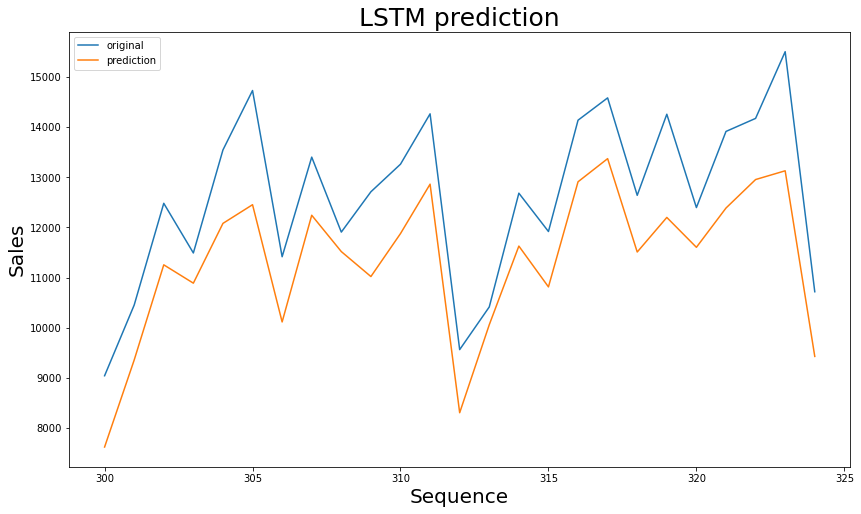

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('LSTM prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 13ms/step - loss: 0.0973 - mae: 0.2926


[0.09733028709888458, 0.29255977272987366]